In [3]:
import numpy as np # linear algebra
import pandas as pd 
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import os
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    BatchNormalization,
    ReLU,
    MaxPooling2D,
    Concatenate,
    GlobalMaxPooling2D,
    GlobalAveragePooling2D,
    Dropout,
    Dense,
    Lambda,
    Reshape,
    Activation,
    Multiply,
)
from keras.layers import Add
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import layers

In [4]:
X_train = []
Y_train = []
image_size = 224
labels = ['adenocarcinoma','large','normal','squamous']
for i in labels:
    folderPath = os.path.join(r"E:\lung_cancer\Data\train",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(labels.index(i))

In [5]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [6]:
X_train.shape

(1000, 224, 224, 3)

In [7]:
def white_balance(channel, perc = 0.05):
    mi, ma = (np.percentile(channel, perc), np.percentile(channel,100.0-perc))
    channel = np.uint8(np.clip((channel-mi)*255.0/(ma-mi), 0, 255))
    return channel
def clahe():
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
    return clahe

In [8]:
def image_enhancer(image_arrays):
    """
    Argument: 
    image_arrays: a list containing arrays of images to be normalized
    
    returns:
    enhanced_images: a list of the enhanced images arrays
    """
    enhanced_images = []  # Create an empty list to store the enhanced images

    for image in image_arrays:
        # White Balance
        image_WB  = np.dstack([white_balance(channel, 0.05) for channel in cv2.split(image)])
        # Convert the white-balanced image to grayscale
        gray_image = cv2.cvtColor(image_WB, cv2.COLOR_RGB2GRAY)

        # CLAHE
        clahe_function = clahe()
        # Apply CLAHE to the grayscale image
        image_clahe = clahe_function.apply(gray_image)
        # Convert the CLAHE-enhanced image back to RGB
        image = cv2.cvtColor(image_clahe, cv2.COLOR_GRAY2RGB)
        
        # Append the enhanced image to the list
        enhanced_images.append(image)
    
    return enhanced_images


In [9]:
enhance_train=image_enhancer(X_train)

In [10]:
enhance_train=np.array(enhance_train)

In [11]:
enhance_train=enhance_train/255.0

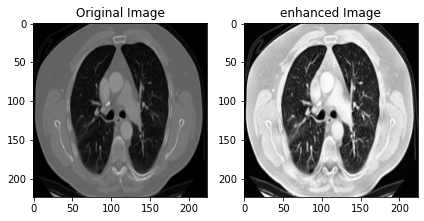

In [12]:
import matplotlib.pyplot as plt

# Assuming you have x_train and x_adversarial arrays available
# Assuming the shape of the RGB images is (image_height, image_width, channels)

# Specify the shape of the images
image_height = 224
image_width = 224
channels = 3

# Reshape the images if needed
original_image = X_train[22] #.reshape((image_height, image_width, channels))
adversarial_image =enhance_train[22] #.reshape((image_height, image_width, channels))
# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

# Plot the adversarial image
plt.subplot(1, 2, 2)
plt.imshow(adversarial_image)
plt.title('enhanced Image')

# Display the plot
plt.tight_layout()
plt.show()


In [13]:
y = tf.keras.utils.to_categorical(Y_train)
X=enhance_train

**Proposed Model (Adam,lr=0.001,categorical cross entropy)**

Epoch 1/30
25/25 [==============================] - 46s 2s/step - loss: 1.3723 - accuracy: 0.3250
Epoch 2/30
25/25 [==============================] - 49s 2s/step - loss: 1.4901 - accuracy: 0.3475
Epoch 3/30
25/25 [==============================] - 48s 2s/step - loss: 1.3233 - accuracy: 0.3875
Epoch 4/30
25/25 [==============================] - 52s 2s/step - loss: 1.0936 - accuracy: 0.4525
Epoch 5/30
25/25 [==============================] - 49s 2s/step - loss: 0.9919 - accuracy: 0.5813
Epoch 6/30
25/25 [==============================] - 51s 2s/step - loss: 0.9028 - accuracy: 0.6275
Epoch 7/30
25/25 [==============================] - 49s 2s/step - loss: 0.7345 - accuracy: 0.6963
Epoch 8/30
25/25 [==============================] - 51s 2s/step - loss: 0.6858 - accuracy: 0.7387
Epoch 9/30
25/25 [==============================] - 52s 2s/step - loss: 0.6177 - accuracy: 0.7588
Epoch 10/30
25/25 [==============================] - 49s 2s/step - loss: 0.4694 - accuracy: 0.8025
Epoch 11/30
25/25 [

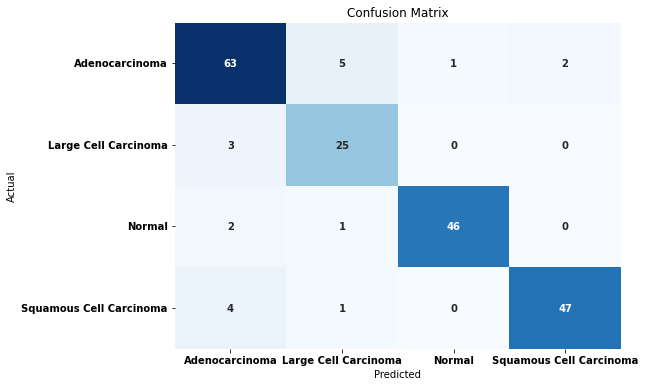

Epoch 1/30
25/25 [==============================] - 52s 2s/step - loss: 1.3149 - accuracy: 0.3462
Epoch 2/30
25/25 [==============================] - 49s 2s/step - loss: 1.1448 - accuracy: 0.4525
Epoch 3/30
25/25 [==============================] - 48s 2s/step - loss: 1.0376 - accuracy: 0.4975
Epoch 4/30
25/25 [==============================] - 48s 2s/step - loss: 0.9144 - accuracy: 0.5825
Epoch 5/30
25/25 [==============================] - 48s 2s/step - loss: 0.7472 - accuracy: 0.6900
Epoch 6/30
25/25 [==============================] - 49s 2s/step - loss: 0.6398 - accuracy: 0.7237
Epoch 7/30
25/25 [==============================] - 49s 2s/step - loss: 0.4894 - accuracy: 0.8025
Epoch 8/30
25/25 [==============================] - 48s 2s/step - loss: 0.4232 - accuracy: 0.8200
Epoch 9/30
25/25 [==============================] - 50s 2s/step - loss: 0.2321 - accuracy: 0.9150
Epoch 10/30
25/25 [==============================] - 52s 2s/step - loss: 0.1679 - accuracy: 0.9337
Epoch 11/30
25/25 [

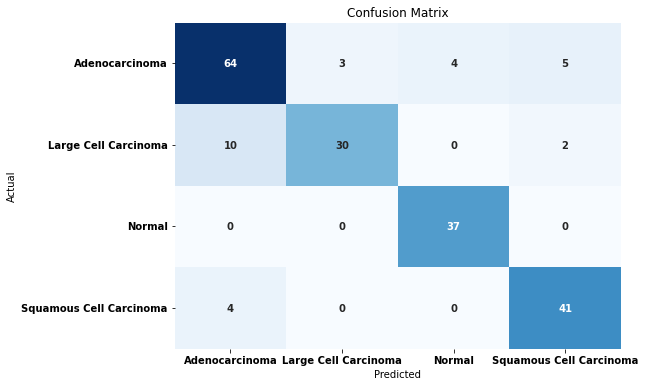

Epoch 1/30
25/25 [==============================] - 54s 2s/step - loss: 1.3731 - accuracy: 0.3375
Epoch 2/30
25/25 [==============================] - 49s 2s/step - loss: 1.3522 - accuracy: 0.3462
Epoch 3/30
25/25 [==============================] - 50s 2s/step - loss: 1.2703 - accuracy: 0.4087
Epoch 4/30
25/25 [==============================] - 50s 2s/step - loss: 1.0999 - accuracy: 0.4787
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 1.1896 - accuracy: 0.4462
Epoch 6/30
25/25 [==============================] - 50s 2s/step - loss: 0.9697 - accuracy: 0.5288
Epoch 7/30
25/25 [==============================] - 51s 2s/step - loss: 0.8067 - accuracy: 0.6500
Epoch 8/30
25/25 [==============================] - 51s 2s/step - loss: 0.7716 - accuracy: 0.6775
Epoch 9/30
25/25 [==============================] - 52s 2s/step - loss: 0.6489 - accuracy: 0.7350
Epoch 10/30
25/25 [==============================] - 50s 2s/step - loss: 0.4515 - accuracy: 0.8350
Epoch 11/30
25/25 [

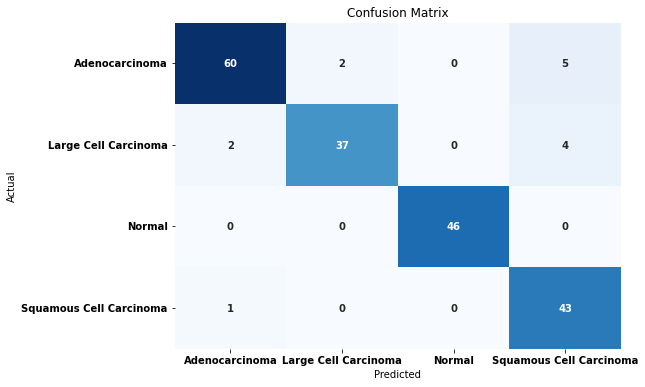

Epoch 1/30
25/25 [==============================] - 58s 2s/step - loss: 1.3698 - accuracy: 0.3438
Epoch 2/30
25/25 [==============================] - 54s 2s/step - loss: 1.2114 - accuracy: 0.4538
Epoch 3/30
25/25 [==============================] - 52s 2s/step - loss: 1.1161 - accuracy: 0.4800
Epoch 4/30
25/25 [==============================] - 49s 2s/step - loss: 1.0350 - accuracy: 0.5113
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 0.8698 - accuracy: 0.6162
Epoch 6/30
25/25 [==============================] - 52s 2s/step - loss: 0.7364 - accuracy: 0.6938
Epoch 7/30
25/25 [==============================] - 52s 2s/step - loss: 0.5655 - accuracy: 0.7638
Epoch 8/30
25/25 [==============================] - 52s 2s/step - loss: 0.4633 - accuracy: 0.8037
Epoch 9/30
25/25 [==============================] - 50s 2s/step - loss: 0.3818 - accuracy: 0.8550
Epoch 10/30
25/25 [==============================] - 49s 2s/step - loss: 0.3012 - accuracy: 0.8875
Epoch 11/30
25/25 [

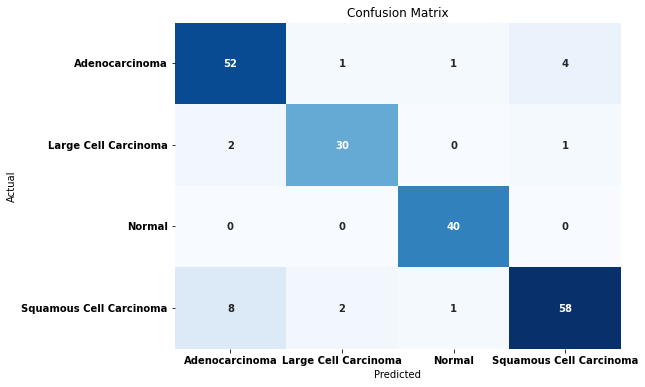

Epoch 1/30
25/25 [==============================] - 50s 2s/step - loss: 1.3308 - accuracy: 0.3350
Epoch 2/30
25/25 [==============================] - 50s 2s/step - loss: 1.1280 - accuracy: 0.4588
Epoch 3/30
25/25 [==============================] - 51s 2s/step - loss: 1.0990 - accuracy: 0.5063
Epoch 4/30
25/25 [==============================] - 51s 2s/step - loss: 0.9130 - accuracy: 0.5700
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 0.7441 - accuracy: 0.6650
Epoch 6/30
25/25 [==============================] - 51s 2s/step - loss: 0.5592 - accuracy: 0.7788
Epoch 7/30
25/25 [==============================] - 48s 2s/step - loss: 0.3975 - accuracy: 0.8512
Epoch 8/30
25/25 [==============================] - 51s 2s/step - loss: 0.3202 - accuracy: 0.8712
Epoch 9/30
25/25 [==============================] - 53s 2s/step - loss: 0.2572 - accuracy: 0.9150
Epoch 10/30
25/25 [==============================] - 52s 2s/step - loss: 0.3044 - accuracy: 0.8875
Epoch 11/30
25/25 [

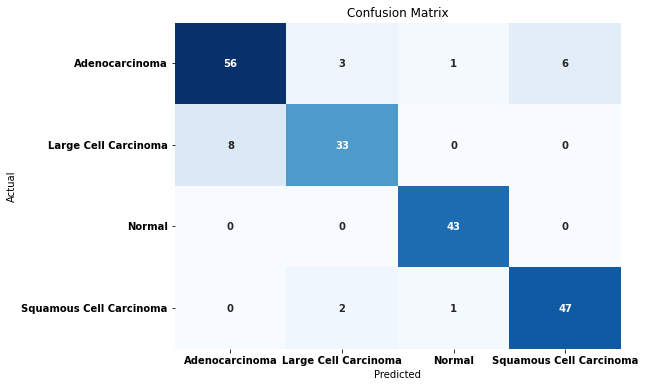

Accuracy List: [0.905, 0.86, 0.93, 0.9, 0.895]
Precision List: [0.909174989144594, 0.8618426822161578, 0.9349450549450549, 0.901321044546851, 0.8939188734414654]
Recall List: [0.905, 0.86, 0.93, 0.9, 0.895]
F1 List: [0.906235734150338, 0.85774407313117, 0.930338492808005, 0.8996371027346636, 0.8938424912619641]
AUC List: [0.9774766962581348, 0.9695113189630734, 0.992899678004865, 0.9916793654940207, 0.985305322080705]
Average Test Accuracy: 0.898
Average Precision: 0.9002405288588247
Average Recall: 0.898
Average F1 Score: 0.8975595788172281
Average AUC Score: 0.9833744761601597


In [17]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Add, GlobalAveragePooling2D, GlobalMaxPooling2D, Activation, Multiply
from tensorflow.keras.models import Model
from sklearn.utils import shuffle
def spatial_attention_block(C_A):
    x = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(C_A)
    y = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(C_A)
    
    x = Concatenate()([x, y])
    x = Activation('relu')(x)
    x = Conv2D(1, 1, padding='same')(x)
    x = Activation('sigmoid')(x)
    S_A = Multiply()([x, C_A])
    
    return S_A

def self_attention(inp):
    shp = inp.shape
    a = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    a = Activation('relu')(a)
    
    b = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    b = Activation('relu')(b)
    
    c = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    c = Activation('relu')(c)
    
    a = Reshape((shp[1] * shp[2], shp[3] // 8))(a)
    b = Reshape((shp[1] * shp[2], shp[3] // 8))(b)
    b = K.permute_dimensions(b, (0, 2, 1))
    c = Reshape((shp[1] * shp[2], shp[3] // 8))(c)
    inter = K.batch_dot(a, b)
    inter = Activation('softmax')(inter)
    out = K.batch_dot(inter, c)
    out = Reshape((shp[1], shp[2], shp[3] // 8))(out)
    out = Conv2D(shp[3], 1, padding='same')(out)
    out = Activation('relu')(out)
    
    return out

def SqueezeAndExcitation(inputs, ratio=8):
    b, _, _, c = K.int_shape(inputs)
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(c // ratio, activation="relu", use_bias=False)(x)
    x = Dense(c, activation="sigmoid", use_bias=False)(x)
    x = Multiply()([inputs, x])
    return x


def channel_attention(inputs):
    shape = K.int_shape(inputs)
    x = MaxPooling2D(pool_size=(shape[1], shape[2]))(inputs)
    x = Conv2D(shape[3] // 8, 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('relu')(x)
    x = Conv2D(shape[3], 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('sigmoid')(x)
    x = Multiply()([x, inputs])
    
    return x

def create_lightweight_cnn(input_shape,num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = AveragePooling2D((2, 2))(x)  # Average pooling layer added
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    a31 = self_attention(x)
    a32 = spatial_attention_block(x)
    a3 = Add()([a31, a32])
    x = channel_attention(a3)
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(4, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

 

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined create_lightweight_cnn and X, y
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
num_classes = 4  # Example number of classes
input_shape = (224, 224, 3)  # Example input shape (height, width, channels)
k = 5  # Number of folds for cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
specificity_list = []  # New list for specificity

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the model
    model = create_lightweight_cnn(input_shape, num_classes)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=30)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate and store metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    auc = roc_auc_score(y_true_classes, y_pred, multi_class='ovo')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    
    
    # Append metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

    # Display the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'], 
                yticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'],
                annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Set labels to bold
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    plt.show()

# Calculate the average of the individual metrics
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)

print("Accuracy List:", accuracy_list)
print("Precision List:", precision_list)
print("Recall List:", recall_list)
print("F1 List:", f1_list)
print("AUC List:", auc_list)

# Print the average metrics
print("Average Test Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print("Average AUC Score:", average_auc)



**lr=0.0001,Adam**

Epoch 1/30
25/25 [==============================] - 54s 2s/step - loss: 1.3740 - accuracy: 0.3025
Epoch 2/30
25/25 [==============================] - 52s 2s/step - loss: 1.3501 - accuracy: 0.3338
Epoch 3/30
25/25 [==============================] - 48s 2s/step - loss: 1.2610 - accuracy: 0.4187
Epoch 4/30
25/25 [==============================] - 52s 2s/step - loss: 1.1398 - accuracy: 0.4837
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 1.0705 - accuracy: 0.4950
Epoch 6/30
25/25 [==============================] - 52s 2s/step - loss: 0.9608 - accuracy: 0.5362
Epoch 7/30
25/25 [==============================] - 56s 2s/step - loss: 0.8780 - accuracy: 0.6275
Epoch 8/30
25/25 [==============================] - 53s 2s/step - loss: 0.8244 - accuracy: 0.6400
Epoch 9/30
25/25 [==============================] - 51s 2s/step - loss: 0.7682 - accuracy: 0.6675
Epoch 10/30
25/25 [==============================] - 51s 2s/step - loss: 0.6974 - accuracy: 0.6925
Epoch 11/30
25/25 [

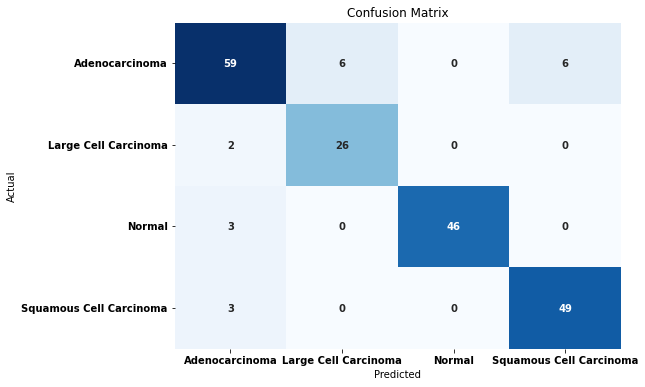

Epoch 1/30
25/25 [==============================] - 72s 2s/step - loss: 1.3763 - accuracy: 0.2950
Epoch 2/30
25/25 [==============================] - 52s 2s/step - loss: 1.3499 - accuracy: 0.3550
Epoch 3/30
25/25 [==============================] - 52s 2s/step - loss: 1.2153 - accuracy: 0.4650
Epoch 4/30
25/25 [==============================] - 48s 2s/step - loss: 1.0388 - accuracy: 0.5138
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 0.9515 - accuracy: 0.6050
Epoch 6/30
25/25 [==============================] - 52s 2s/step - loss: 0.8696 - accuracy: 0.6137
Epoch 7/30
25/25 [==============================] - 53s 2s/step - loss: 0.8098 - accuracy: 0.6525
Epoch 8/30
25/25 [==============================] - 52s 2s/step - loss: 0.7670 - accuracy: 0.6612
Epoch 9/30
25/25 [==============================] - 52s 2s/step - loss: 0.6953 - accuracy: 0.6975
Epoch 10/30
25/25 [==============================] - 49s 2s/step - loss: 0.6200 - accuracy: 0.7538
Epoch 11/30
25/25 [

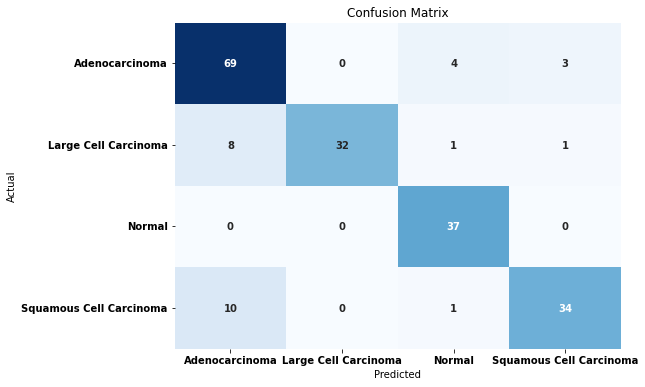

Epoch 1/30
25/25 [==============================] - 58s 2s/step - loss: 1.3572 - accuracy: 0.3388
Epoch 2/30
25/25 [==============================] - 49s 2s/step - loss: 1.3353 - accuracy: 0.3500
Epoch 3/30
25/25 [==============================] - 51s 2s/step - loss: 1.2505 - accuracy: 0.4112
Epoch 4/30
25/25 [==============================] - 53s 2s/step - loss: 1.1141 - accuracy: 0.4800
Epoch 5/30
25/25 [==============================] - 52s 2s/step - loss: 0.9689 - accuracy: 0.5587
Epoch 6/30
25/25 [==============================] - 51s 2s/step - loss: 0.8509 - accuracy: 0.6400
Epoch 7/30
25/25 [==============================] - 52s 2s/step - loss: 0.7780 - accuracy: 0.6525
Epoch 8/30
25/25 [==============================] - 51s 2s/step - loss: 0.7081 - accuracy: 0.6963
Epoch 9/30
25/25 [==============================] - 53s 2s/step - loss: 0.5882 - accuracy: 0.7538
Epoch 10/30
25/25 [==============================] - 51s 2s/step - loss: 0.5190 - accuracy: 0.7862
Epoch 11/30
25/25 [

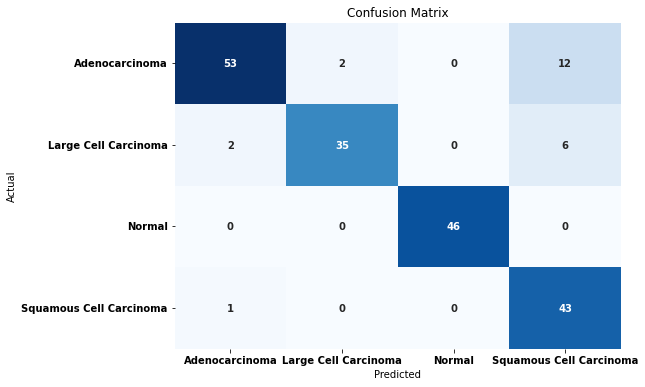

Epoch 1/30
25/25 [==============================] - 52s 2s/step - loss: 1.3683 - accuracy: 0.3363
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 1.3383 - accuracy: 0.3525
Epoch 3/30
25/25 [==============================] - 53s 2s/step - loss: 1.2319 - accuracy: 0.4688
Epoch 4/30
25/25 [==============================] - 54s 2s/step - loss: 1.0934 - accuracy: 0.4925
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 0.9907 - accuracy: 0.5400
Epoch 6/30
25/25 [==============================] - 52s 2s/step - loss: 0.9209 - accuracy: 0.6100
Epoch 7/30
25/25 [==============================] - 51s 2s/step - loss: 0.8362 - accuracy: 0.6513
Epoch 8/30
25/25 [==============================] - 50s 2s/step - loss: 0.7786 - accuracy: 0.6612
Epoch 9/30
25/25 [==============================] - 52s 2s/step - loss: 0.6866 - accuracy: 0.7150
Epoch 10/30
25/25 [==============================] - 54s 2s/step - loss: 0.6117 - accuracy: 0.7575
Epoch 11/30
25/25 [

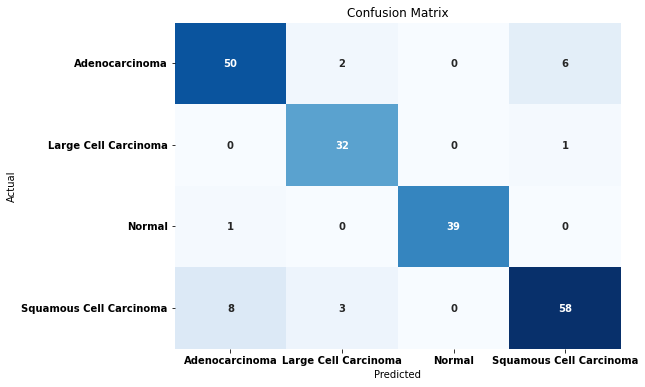

Epoch 1/30
25/25 [==============================] - 51s 2s/step - loss: 1.3576 - accuracy: 0.3200
Epoch 2/30
25/25 [==============================] - 49s 2s/step - loss: 1.3202 - accuracy: 0.3738
Epoch 3/30
25/25 [==============================] - 47s 2s/step - loss: 1.1812 - accuracy: 0.4313
Epoch 4/30
25/25 [==============================] - 51s 2s/step - loss: 1.0612 - accuracy: 0.4963
Epoch 5/30
25/25 [==============================] - 49s 2s/step - loss: 0.9582 - accuracy: 0.5663
Epoch 6/30
25/25 [==============================] - 52s 2s/step - loss: 0.9255 - accuracy: 0.5962
Epoch 7/30
25/25 [==============================] - 50s 2s/step - loss: 0.8249 - accuracy: 0.6413
Epoch 8/30
25/25 [==============================] - 51s 2s/step - loss: 0.7453 - accuracy: 0.6925
Epoch 9/30
25/25 [==============================] - 58s 2s/step - loss: 0.6542 - accuracy: 0.7275
Epoch 10/30
25/25 [==============================] - 52s 2s/step - loss: 0.5718 - accuracy: 0.7663
Epoch 11/30
25/25 [

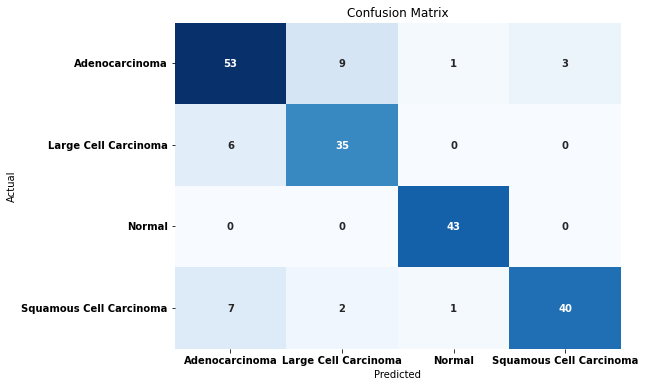

Accuracy List: [0.9, 0.86, 0.885, 0.895, 0.855]
Precision List: [0.902998303934871, 0.8718811463301398, 0.9055139170200646, 0.8963115684132634, 0.8589808448488934]
Recall List: [0.9, 0.86, 0.885, 0.895, 0.855]
F1 List: [0.9002780569872467, 0.8588017624302549, 0.8870146631823462, 0.8948454615686809, 0.8551099285401287]
AUC List: [0.985325216605757, 0.9852286967418546, 0.9884396469486377, 0.9834891897485601, 0.9768387791700328]
Average Test Accuracy: 0.8789999999999999
Average Precision: 0.8871371561094465
Average Recall: 0.8789999999999999
Average F1 Score: 0.8792099745417316
Average AUC Score: 0.9838643058429686


In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Add, GlobalAveragePooling2D, GlobalMaxPooling2D, Activation, Multiply
from tensorflow.keras.models import Model
from sklearn.utils import shuffle
def spatial_attention_block(C_A):
    x = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(C_A)
    y = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(C_A)
    
    x = Concatenate()([x, y])
    x = Activation('relu')(x)
    x = Conv2D(1, 1, padding='same')(x)
    x = Activation('sigmoid')(x)
    S_A = Multiply()([x, C_A])
    
    return S_A

def self_attention(inp):
    shp = inp.shape
    a = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    a = Activation('relu')(a)
    
    b = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    b = Activation('relu')(b)
    
    c = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    c = Activation('relu')(c)
    
    a = Reshape((shp[1] * shp[2], shp[3] // 8))(a)
    b = Reshape((shp[1] * shp[2], shp[3] // 8))(b)
    b = K.permute_dimensions(b, (0, 2, 1))
    c = Reshape((shp[1] * shp[2], shp[3] // 8))(c)
    inter = K.batch_dot(a, b)
    inter = Activation('softmax')(inter)
    out = K.batch_dot(inter, c)
    out = Reshape((shp[1], shp[2], shp[3] // 8))(out)
    out = Conv2D(shp[3], 1, padding='same')(out)
    out = Activation('relu')(out)
    
    return out

def SqueezeAndExcitation(inputs, ratio=8):
    b, _, _, c = K.int_shape(inputs)
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(c // ratio, activation="relu", use_bias=False)(x)
    x = Dense(c, activation="sigmoid", use_bias=False)(x)
    x = Multiply()([inputs, x])
    return x


def channel_attention(inputs):
    shape = K.int_shape(inputs)
    x = MaxPooling2D(pool_size=(shape[1], shape[2]))(inputs)
    x = Conv2D(shape[3] // 8, 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('relu')(x)
    x = Conv2D(shape[3], 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('sigmoid')(x)
    x = Multiply()([x, inputs])
    
    return x

def create_lightweight_cnn(input_shape,num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = AveragePooling2D((2, 2))(x)  # Average pooling layer added
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    a31 = self_attention(x)
    a32 = spatial_attention_block(x)
    a3 = Add()([a31, a32])
    x = channel_attention(a3)
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(4, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

 

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined create_lightweight_cnn and X, y
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
num_classes = 4  # Example number of classes
input_shape = (224, 224, 3)  # Example input shape (height, width, channels)
k = 5  # Number of folds for cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
specificity_list = []  # New list for specificity

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the model
    model = create_lightweight_cnn(input_shape, num_classes)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=30)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate and store metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    auc = roc_auc_score(y_true_classes, y_pred, multi_class='ovo')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    
    
    # Append metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

    # Display the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'], 
                yticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'],
                annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Set labels to bold
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    plt.show()

# Calculate the average of the individual metrics
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)

print("Accuracy List:", accuracy_list)
print("Precision List:", precision_list)
print("Recall List:", recall_list)
print("F1 List:", f1_list)
print("AUC List:", auc_list)

# Print the average metrics
print("Average Test Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print("Average AUC Score:", average_auc)



**lr=0.00001**

Epoch 1/30
25/25 [==============================] - 41s 2s/step - loss: 1.3809 - accuracy: 0.3212
Epoch 2/30
25/25 [==============================] - 35s 1s/step - loss: 1.3695 - accuracy: 0.3338
Epoch 3/30
25/25 [==============================] - 35s 1s/step - loss: 1.3590 - accuracy: 0.3338
Epoch 4/30
25/25 [==============================] - 35s 1s/step - loss: 1.3517 - accuracy: 0.3338
Epoch 5/30
25/25 [==============================] - 35s 1s/step - loss: 1.3429 - accuracy: 0.3338
Epoch 6/30
25/25 [==============================] - 36s 1s/step - loss: 1.3323 - accuracy: 0.3388
Epoch 7/30
25/25 [==============================] - 34s 1s/step - loss: 1.3177 - accuracy: 0.3650
Epoch 8/30
25/25 [==============================] - 35s 1s/step - loss: 1.2961 - accuracy: 0.3988
Epoch 9/30
25/25 [==============================] - 36s 1s/step - loss: 1.2657 - accuracy: 0.4263
Epoch 10/30
25/25 [==============================] - 35s 1s/step - loss: 1.2319 - accuracy: 0.4500
Epoch 11/30
25/25 [

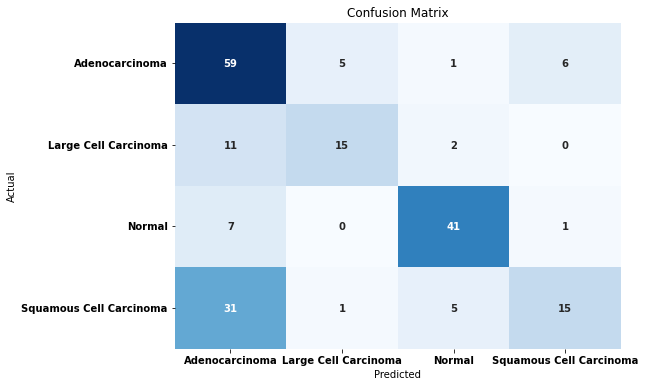

Epoch 1/30
25/25 [==============================] - 55s 2s/step - loss: 1.3833 - accuracy: 0.2862
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 1.3761 - accuracy: 0.3575
Epoch 3/30
25/25 [==============================] - 69s 3s/step - loss: 1.3655 - accuracy: 0.3487
Epoch 4/30
25/25 [==============================] - 56s 2s/step - loss: 1.3549 - accuracy: 0.3363
Epoch 5/30
25/25 [==============================] - 54s 2s/step - loss: 1.3427 - accuracy: 0.3438
Epoch 6/30
25/25 [==============================] - 54s 2s/step - loss: 1.3283 - accuracy: 0.3625
Epoch 7/30
25/25 [==============================] - 52s 2s/step - loss: 1.3118 - accuracy: 0.3963
Epoch 8/30
25/25 [==============================] - 53s 2s/step - loss: 1.2873 - accuracy: 0.4150
Epoch 9/30
25/25 [==============================] - 51s 2s/step - loss: 1.2548 - accuracy: 0.4487
Epoch 10/30
25/25 [==============================] - 52s 2s/step - loss: 1.2234 - accuracy: 0.4625
Epoch 11/30
25/25 [

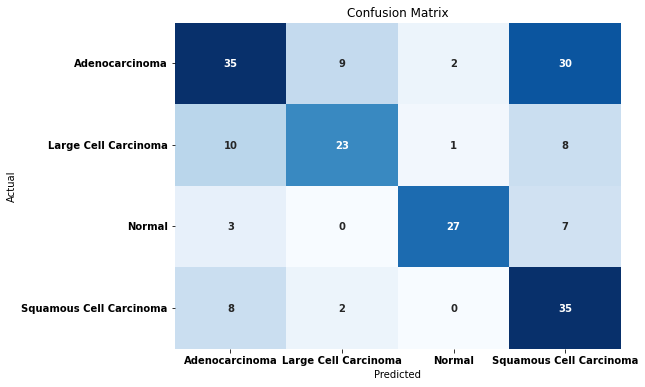

Epoch 1/30
25/25 [==============================] - 63s 2s/step - loss: 1.3824 - accuracy: 0.3212
Epoch 2/30
25/25 [==============================] - 52s 2s/step - loss: 1.3718 - accuracy: 0.3388
Epoch 3/30
25/25 [==============================] - 52s 2s/step - loss: 1.3594 - accuracy: 0.3388
Epoch 4/30
25/25 [==============================] - 52s 2s/step - loss: 1.3509 - accuracy: 0.3388
Epoch 5/30
25/25 [==============================] - 56s 2s/step - loss: 1.3439 - accuracy: 0.3388
Epoch 6/30
25/25 [==============================] - 52s 2s/step - loss: 1.3352 - accuracy: 0.3438
Epoch 7/30
25/25 [==============================] - 49s 2s/step - loss: 1.3235 - accuracy: 0.3650
Epoch 8/30
25/25 [==============================] - 53s 2s/step - loss: 1.3088 - accuracy: 0.3850
Epoch 9/30
25/25 [==============================] - 55s 2s/step - loss: 1.2912 - accuracy: 0.3938
Epoch 10/30
25/25 [==============================] - 54s 2s/step - loss: 1.2618 - accuracy: 0.4325
Epoch 11/30
25/25 [

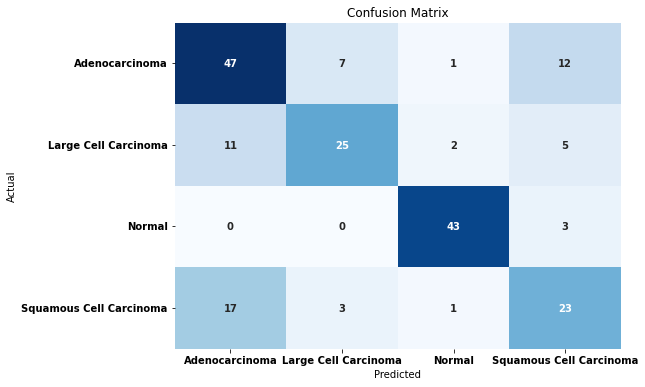

Epoch 1/30
25/25 [==============================] - 55s 2s/step - loss: 1.3805 - accuracy: 0.3350
Epoch 2/30
25/25 [==============================] - 52s 2s/step - loss: 1.3689 - accuracy: 0.3500
Epoch 3/30
25/25 [==============================] - 51s 2s/step - loss: 1.3566 - accuracy: 0.3500
Epoch 4/30
25/25 [==============================] - 52s 2s/step - loss: 1.3506 - accuracy: 0.3500
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 1.3438 - accuracy: 0.3500
Epoch 6/30
25/25 [==============================] - 50s 2s/step - loss: 1.3370 - accuracy: 0.3625
Epoch 7/30
25/25 [==============================] - 51s 2s/step - loss: 1.3291 - accuracy: 0.3762
Epoch 8/30
25/25 [==============================] - 51s 2s/step - loss: 1.3163 - accuracy: 0.3800
Epoch 9/30
25/25 [==============================] - 52s 2s/step - loss: 1.3026 - accuracy: 0.4013
Epoch 10/30
25/25 [==============================] - 54s 2s/step - loss: 1.2827 - accuracy: 0.4375
Epoch 11/30
25/25 [

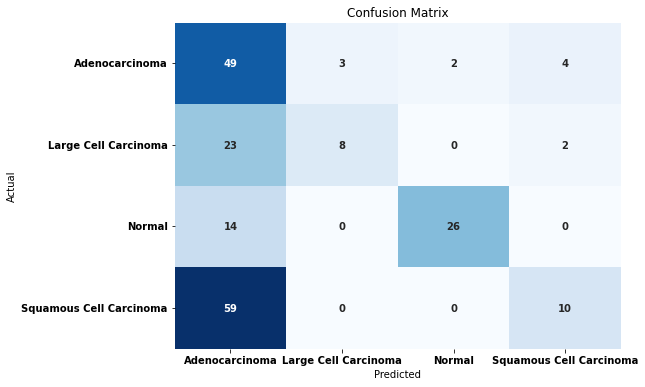

Epoch 1/30
25/25 [==============================] - 56s 2s/step - loss: 1.3833 - accuracy: 0.3212
Epoch 2/30
25/25 [==============================] - 52s 2s/step - loss: 1.3751 - accuracy: 0.3400
Epoch 3/30
25/25 [==============================] - 52s 2s/step - loss: 1.3637 - accuracy: 0.3400
Epoch 4/30
25/25 [==============================] - 50s 2s/step - loss: 1.3533 - accuracy: 0.3400
Epoch 5/30
25/25 [==============================] - 49s 2s/step - loss: 1.3453 - accuracy: 0.3400
Epoch 6/30
25/25 [==============================] - 50s 2s/step - loss: 1.3363 - accuracy: 0.3400
Epoch 7/30
25/25 [==============================] - 48s 2s/step - loss: 1.3268 - accuracy: 0.3600
Epoch 8/30
25/25 [==============================] - 49s 2s/step - loss: 1.3110 - accuracy: 0.3738
Epoch 9/30
25/25 [==============================] - 50s 2s/step - loss: 1.2905 - accuracy: 0.3875
Epoch 10/30
25/25 [==============================] - 49s 2s/step - loss: 1.2621 - accuracy: 0.4263
Epoch 11/30
25/25 [

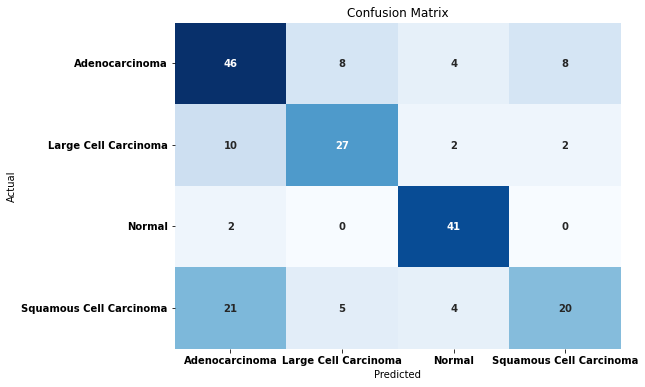

Accuracy List: [0.65, 0.6, 0.69, 0.465, 0.67]
Precision List: [0.6762079124579126, 0.6444963235294118, 0.6916047124243068, 0.6193392857142858, 0.6700367026557459]
Recall List: [0.65, 0.6, 0.69, 0.465, 0.67]
F1 List: [0.6301420374884062, 0.6037248922849865, 0.6885910873242651, 0.43411764705882355, 0.658599168500856]
AUC List: [0.8639247836574655, 0.8718171178697492, 0.8807069990611334, 0.7940166122746707, 0.8981114606072064]
Average Test Accuracy: 0.615
Average Precision: 0.6603369873563325
Average Recall: 0.615
Average F1 Score: 0.6030349665314676
Average AUC Score: 0.861715394694045


In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Add, GlobalAveragePooling2D, GlobalMaxPooling2D, Activation, Multiply
from tensorflow.keras.models import Model
from sklearn.utils import shuffle
def spatial_attention_block(C_A):
    x = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(C_A)
    y = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(C_A)
    
    x = Concatenate()([x, y])
    x = Activation('relu')(x)
    x = Conv2D(1, 1, padding='same')(x)
    x = Activation('sigmoid')(x)
    S_A = Multiply()([x, C_A])
    
    return S_A

def self_attention(inp):
    shp = inp.shape
    a = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    a = Activation('relu')(a)
    
    b = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    b = Activation('relu')(b)
    
    c = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    c = Activation('relu')(c)
    
    a = Reshape((shp[1] * shp[2], shp[3] // 8))(a)
    b = Reshape((shp[1] * shp[2], shp[3] // 8))(b)
    b = K.permute_dimensions(b, (0, 2, 1))
    c = Reshape((shp[1] * shp[2], shp[3] // 8))(c)
    inter = K.batch_dot(a, b)
    inter = Activation('softmax')(inter)
    out = K.batch_dot(inter, c)
    out = Reshape((shp[1], shp[2], shp[3] // 8))(out)
    out = Conv2D(shp[3], 1, padding='same')(out)
    out = Activation('relu')(out)
    
    return out

def SqueezeAndExcitation(inputs, ratio=8):
    b, _, _, c = K.int_shape(inputs)
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(c // ratio, activation="relu", use_bias=False)(x)
    x = Dense(c, activation="sigmoid", use_bias=False)(x)
    x = Multiply()([inputs, x])
    return x


def channel_attention(inputs):
    shape = K.int_shape(inputs)
    x = MaxPooling2D(pool_size=(shape[1], shape[2]))(inputs)
    x = Conv2D(shape[3] // 8, 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('relu')(x)
    x = Conv2D(shape[3], 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('sigmoid')(x)
    x = Multiply()([x, inputs])
    
    return x

def create_lightweight_cnn(input_shape,num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = AveragePooling2D((2, 2))(x)  # Average pooling layer added
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    a31 = self_attention(x)
    a32 = spatial_attention_block(x)
    a3 = Add()([a31, a32])
    x = channel_attention(a3)
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(4, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

 

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined create_lightweight_cnn and X, y
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
num_classes = 4  # Example number of classes
input_shape = (224, 224, 3)  # Example input shape (height, width, channels)
k = 5  # Number of folds for cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
specificity_list = []  # New list for specificity

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the model
    model = create_lightweight_cnn(input_shape, num_classes)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=30)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate and store metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    auc = roc_auc_score(y_true_classes, y_pred, multi_class='ovo')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    
    
    # Append metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

    # Display the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'], 
                yticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'],
                annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Set labels to bold
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    plt.show()

# Calculate the average of the individual metrics
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)

print("Accuracy List:", accuracy_list)
print("Precision List:", precision_list)
print("Recall List:", recall_list)
print("F1 List:", f1_list)
print("AUC List:", auc_list)

# Print the average metrics
print("Average Test Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print("Average AUC Score:", average_auc)



**Nadam,lr=0.001**

Epoch 1/30
25/25 [==============================] - 50s 2s/step - loss: 1.3804 - accuracy: 0.3438
Epoch 2/30
25/25 [==============================] - 50s 2s/step - loss: 1.3133 - accuracy: 0.3975
Epoch 3/30
25/25 [==============================] - 49s 2s/step - loss: 1.1168 - accuracy: 0.4775
Epoch 4/30
25/25 [==============================] - 51s 2s/step - loss: 1.0378 - accuracy: 0.5213
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 0.8214 - accuracy: 0.6425
Epoch 6/30
25/25 [==============================] - 46s 2s/step - loss: 0.7078 - accuracy: 0.7013
Epoch 7/30
25/25 [==============================] - 51s 2s/step - loss: 0.5150 - accuracy: 0.7837
Epoch 8/30
25/25 [==============================] - 52s 2s/step - loss: 0.4384 - accuracy: 0.8250
Epoch 9/30
25/25 [==============================] - 52s 2s/step - loss: 0.3469 - accuracy: 0.8725
Epoch 10/30
25/25 [==============================] - 53s 2s/step - loss: 0.2678 - accuracy: 0.9125
Epoch 11/30
25/25 [

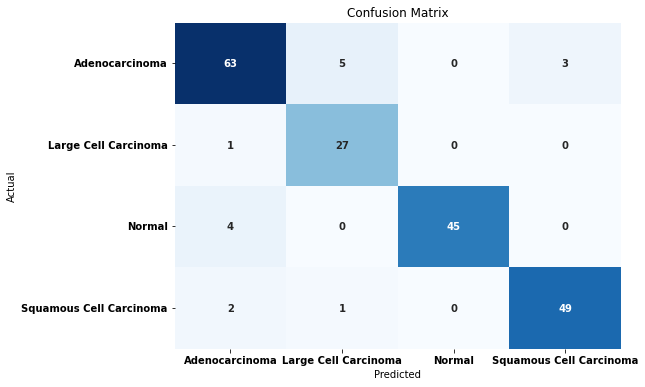

Epoch 1/30
25/25 [==============================] - 59s 2s/step - loss: 1.3997 - accuracy: 0.3300
Epoch 2/30
25/25 [==============================] - 53s 2s/step - loss: 1.2343 - accuracy: 0.4487
Epoch 3/30
25/25 [==============================] - 55s 2s/step - loss: 0.9366 - accuracy: 0.5675
Epoch 4/30
25/25 [==============================] - 53s 2s/step - loss: 0.7066 - accuracy: 0.6888
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 0.4725 - accuracy: 0.8125
Epoch 6/30
25/25 [==============================] - 53s 2s/step - loss: 0.3218 - accuracy: 0.8712
Epoch 7/30
25/25 [==============================] - 51s 2s/step - loss: 0.2104 - accuracy: 0.9250
Epoch 8/30
25/25 [==============================] - 53s 2s/step - loss: 0.3337 - accuracy: 0.8950
Epoch 9/30
25/25 [==============================] - 52s 2s/step - loss: 0.1244 - accuracy: 0.9613
Epoch 10/30
25/25 [==============================] - 53s 2s/step - loss: 0.1123 - accuracy: 0.9588
Epoch 11/30
25/25 [

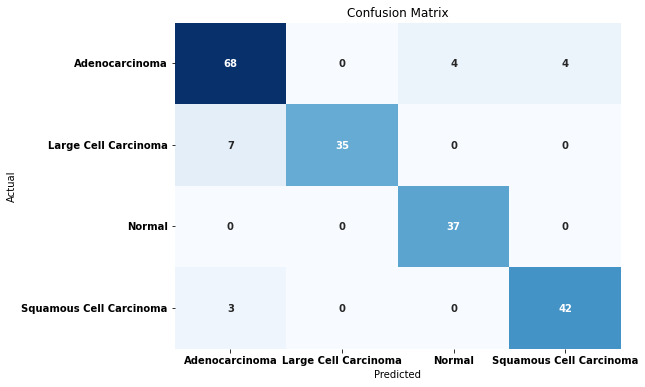

Epoch 1/30
25/25 [==============================] - 57s 2s/step - loss: 1.4251 - accuracy: 0.3400
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 1.3518 - accuracy: 0.3462
Epoch 3/30
25/25 [==============================] - 52s 2s/step - loss: 1.1759 - accuracy: 0.4288
Epoch 4/30
25/25 [==============================] - 47s 2s/step - loss: 1.0888 - accuracy: 0.4475
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 1.0752 - accuracy: 0.5088
Epoch 6/30
25/25 [==============================] - 51s 2s/step - loss: 0.8855 - accuracy: 0.5975
Epoch 7/30
25/25 [==============================] - 52s 2s/step - loss: 0.7402 - accuracy: 0.6787
Epoch 8/30
25/25 [==============================] - 52s 2s/step - loss: 0.6023 - accuracy: 0.7563
Epoch 9/30
25/25 [==============================] - 50s 2s/step - loss: 0.3856 - accuracy: 0.8413
Epoch 10/30
25/25 [==============================] - 49s 2s/step - loss: 0.2688 - accuracy: 0.8950
Epoch 11/30
25/25 [

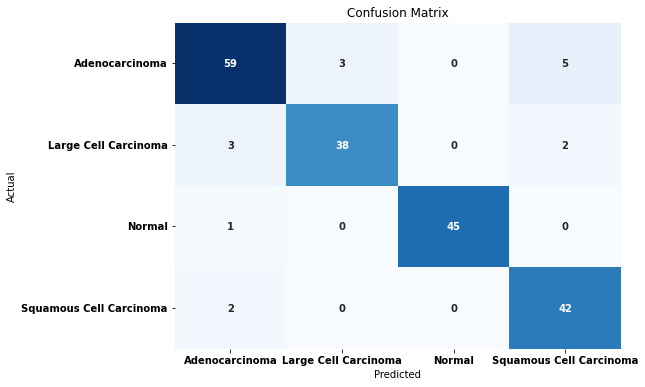

Epoch 1/30
25/25 [==============================] - 57s 2s/step - loss: 1.3629 - accuracy: 0.3487
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 1.2770 - accuracy: 0.3950
Epoch 3/30
25/25 [==============================] - 49s 2s/step - loss: 1.0565 - accuracy: 0.5263
Epoch 4/30
25/25 [==============================] - 48s 2s/step - loss: 0.8425 - accuracy: 0.6400
Epoch 5/30
25/25 [==============================] - 48s 2s/step - loss: 0.6509 - accuracy: 0.7287
Epoch 6/30
25/25 [==============================] - 49s 2s/step - loss: 0.5753 - accuracy: 0.7725
Epoch 7/30
25/25 [==============================] - 49s 2s/step - loss: 0.3897 - accuracy: 0.8388
Epoch 8/30
25/25 [==============================] - 47s 2s/step - loss: 0.3015 - accuracy: 0.8788
Epoch 9/30
25/25 [==============================] - 48s 2s/step - loss: 0.2195 - accuracy: 0.9100
Epoch 10/30
25/25 [==============================] - 50s 2s/step - loss: 0.2189 - accuracy: 0.9200
Epoch 11/30
25/25 [

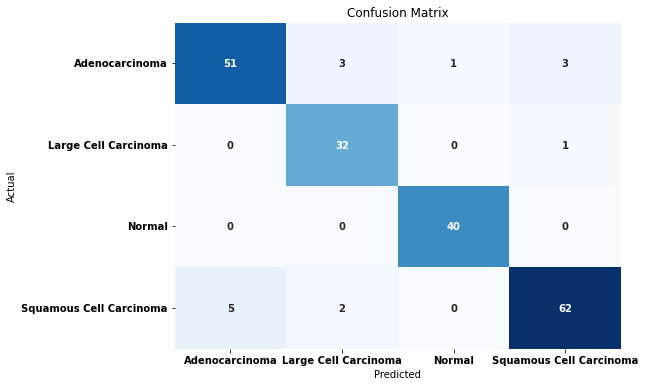

Epoch 1/30
25/25 [==============================] - 59s 2s/step - loss: 1.4014 - accuracy: 0.3413
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 1.3517 - accuracy: 0.3562
Epoch 3/30
25/25 [==============================] - 50s 2s/step - loss: 1.2241 - accuracy: 0.4263
Epoch 4/30
25/25 [==============================] - 47s 2s/step - loss: 0.9744 - accuracy: 0.5525
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 0.7650 - accuracy: 0.6725
Epoch 6/30
25/25 [==============================] - 51s 2s/step - loss: 0.5382 - accuracy: 0.7675
Epoch 7/30
25/25 [==============================] - 51s 2s/step - loss: 0.4641 - accuracy: 0.8288
Epoch 8/30
25/25 [==============================] - 51s 2s/step - loss: 0.3050 - accuracy: 0.8938
Epoch 9/30
25/25 [==============================] - 51s 2s/step - loss: 0.2100 - accuracy: 0.9125
Epoch 10/30
25/25 [==============================] - 49s 2s/step - loss: 0.2018 - accuracy: 0.9225
Epoch 11/30
25/25 [

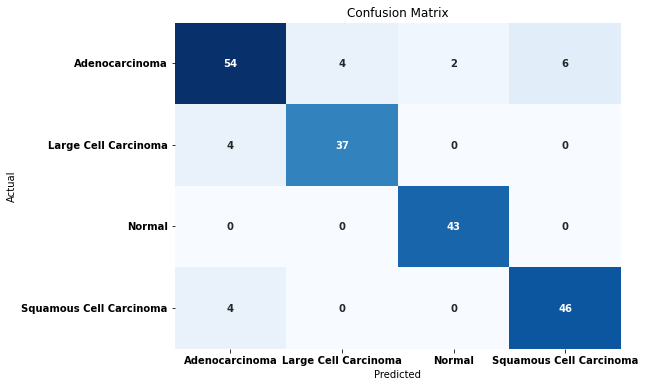

Accuracy List: [0.92, 0.91, 0.92, 0.925, 0.9]
Precision List: [0.9240454545454546, 0.9136680534029421, 0.9219166443312785, 0.9260227058702668, 0.8990176454370002]
Recall List: [0.92, 0.91, 0.92, 0.925, 0.9]
F1 List: [0.9207429368678061, 0.9096986346986347, 0.9201757113853887, 0.9247505801540891, 0.8990413324420677]
AUC List: [0.9899338798357912, 0.9895316055403774, 0.9915124859432959, 0.994495854976552, 0.981702504340054]
Average Test Accuracy: 0.915
Average Precision: 0.9169341007173883
Average Recall: 0.915
Average F1 Score: 0.9148818391095974
Average AUC Score: 0.9894352661272141


In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Add, GlobalAveragePooling2D, GlobalMaxPooling2D, Activation, Multiply
from tensorflow.keras.models import Model
from sklearn.utils import shuffle
def spatial_attention_block(C_A):
    x = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(C_A)
    y = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(C_A)
    
    x = Concatenate()([x, y])
    x = Activation('relu')(x)
    x = Conv2D(1, 1, padding='same')(x)
    x = Activation('sigmoid')(x)
    S_A = Multiply()([x, C_A])
    
    return S_A

def self_attention(inp):
    shp = inp.shape
    a = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    a = Activation('relu')(a)
    
    b = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    b = Activation('relu')(b)
    
    c = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    c = Activation('relu')(c)
    
    a = Reshape((shp[1] * shp[2], shp[3] // 8))(a)
    b = Reshape((shp[1] * shp[2], shp[3] // 8))(b)
    b = K.permute_dimensions(b, (0, 2, 1))
    c = Reshape((shp[1] * shp[2], shp[3] // 8))(c)
    inter = K.batch_dot(a, b)
    inter = Activation('softmax')(inter)
    out = K.batch_dot(inter, c)
    out = Reshape((shp[1], shp[2], shp[3] // 8))(out)
    out = Conv2D(shp[3], 1, padding='same')(out)
    out = Activation('relu')(out)
    
    return out

def SqueezeAndExcitation(inputs, ratio=8):
    b, _, _, c = K.int_shape(inputs)
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(c // ratio, activation="relu", use_bias=False)(x)
    x = Dense(c, activation="sigmoid", use_bias=False)(x)
    x = Multiply()([inputs, x])
    return x


def channel_attention(inputs):
    shape = K.int_shape(inputs)
    x = MaxPooling2D(pool_size=(shape[1], shape[2]))(inputs)
    x = Conv2D(shape[3] // 8, 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('relu')(x)
    x = Conv2D(shape[3], 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('sigmoid')(x)
    x = Multiply()([x, inputs])
    
    return x

def create_lightweight_cnn(input_shape,num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = AveragePooling2D((2, 2))(x)  # Average pooling layer added
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    a31 = self_attention(x)
    a32 = spatial_attention_block(x)
    a3 = Add()([a31, a32])
    x = channel_attention(a3)
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(4, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

 

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined create_lightweight_cnn and X, y
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
num_classes = 4  # Example number of classes
input_shape = (224, 224, 3)  # Example input shape (height, width, channels)
k = 5  # Number of folds for cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
specificity_list = []  # New list for specificity

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the model
    model = create_lightweight_cnn(input_shape, num_classes)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=30)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate and store metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    auc = roc_auc_score(y_true_classes, y_pred, multi_class='ovo')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    
    
    # Append metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

    # Display the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'], 
                yticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'],
                annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Set labels to bold
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    plt.show()

# Calculate the average of the individual metrics
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)

print("Accuracy List:", accuracy_list)
print("Precision List:", precision_list)
print("Recall List:", recall_list)
print("F1 List:", f1_list)
print("AUC List:", auc_list)

# Print the average metrics
print("Average Test Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print("Average AUC Score:", average_auc)



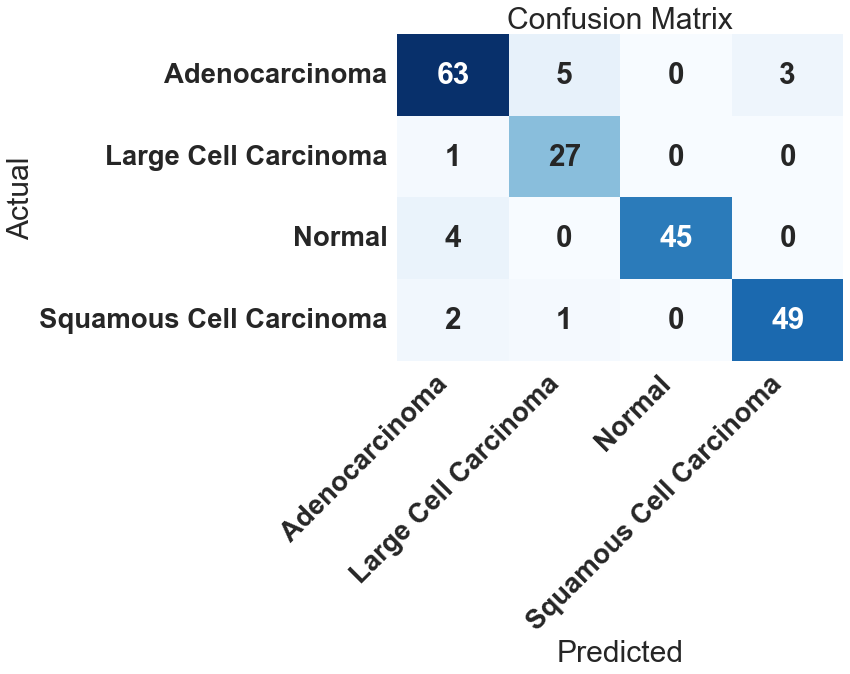

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
data = [
    [63, 5, 0, 3],
    [1, 27, 0, 0],
    [4, 0, 45, 0],
    [2, 1, 0, 49]
]

# Convert data to numpy array
conf_matrix = np.array(data)

# Set the font scale
sns.set(font_scale=2.5)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'], 
            yticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'],
            annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Rotate labels by 45 degrees
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Set labels to bold
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

plt.show()


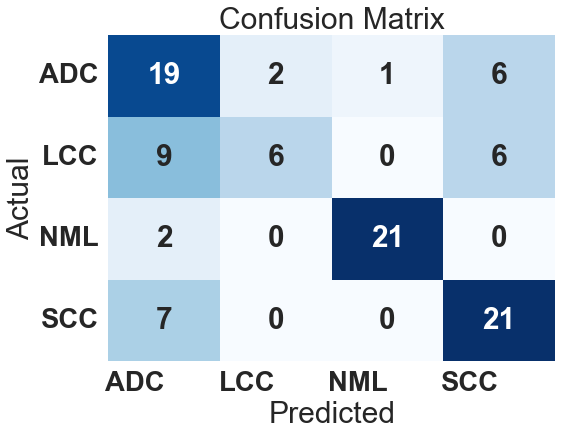

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
data = [
    [19, 2, 1, 6],
    [9, 6, 0, 6],
    [2, 0, 21, 0],
    [7, 0, 0, 21]
]

# Convert data to numpy array
conf_matrix = np.array(data)

# Set the font scale
sns.set(font_scale=2.5)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['ADC','LCC','NML','SCC'], 
            yticklabels=['ADC','LCC','NML','SCC'],
            annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Rotate labels by 45 degrees
plt.xticks(rotation=0, ha='right')
plt.yticks(rotation=0)

# Set labels to bold
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

plt.show()


**Nadam,lr=0.0001**

Epoch 1/30
25/25 [==============================] - 50s 2s/step - loss: 1.3631 - accuracy: 0.3300
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 1.2570 - accuracy: 0.4437
Epoch 3/30
25/25 [==============================] - 52s 2s/step - loss: 1.1244 - accuracy: 0.4750
Epoch 4/30
25/25 [==============================] - 54s 2s/step - loss: 1.0714 - accuracy: 0.4675
Epoch 5/30
25/25 [==============================] - 53s 2s/step - loss: 1.0296 - accuracy: 0.5013
Epoch 6/30
25/25 [==============================] - 54s 2s/step - loss: 0.9693 - accuracy: 0.5462
Epoch 7/30
25/25 [==============================] - 57s 2s/step - loss: 0.8858 - accuracy: 0.6062
Epoch 8/30
25/25 [==============================] - 54s 2s/step - loss: 0.8196 - accuracy: 0.6338
Epoch 9/30
25/25 [==============================] - 53s 2s/step - loss: 0.7561 - accuracy: 0.6500
Epoch 10/30
25/25 [==============================] - 55s 2s/step - loss: 0.6753 - accuracy: 0.7075
Epoch 11/30
25/25 [

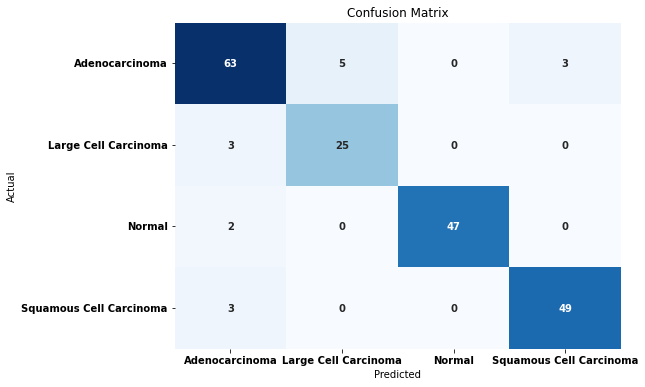

Epoch 1/30
25/25 [==============================] - 70s 2s/step - loss: 1.3660 - accuracy: 0.3250
Epoch 2/30
25/25 [==============================] - 49s 2s/step - loss: 1.3069 - accuracy: 0.3862
Epoch 3/30
25/25 [==============================] - 53s 2s/step - loss: 1.1238 - accuracy: 0.4688
Epoch 4/30
25/25 [==============================] - 54s 2s/step - loss: 0.9459 - accuracy: 0.5763
Epoch 5/30
25/25 [==============================] - 53s 2s/step - loss: 0.8188 - accuracy: 0.6413
Epoch 6/30
25/25 [==============================] - 52s 2s/step - loss: 0.7120 - accuracy: 0.6812
Epoch 7/30
25/25 [==============================] - 54s 2s/step - loss: 0.6152 - accuracy: 0.7450
Epoch 8/30
25/25 [==============================] - 51s 2s/step - loss: 0.5284 - accuracy: 0.7638
Epoch 9/30
25/25 [==============================] - 52s 2s/step - loss: 0.4209 - accuracy: 0.8400
Epoch 10/30
25/25 [==============================] - 55s 2s/step - loss: 0.3469 - accuracy: 0.8700
Epoch 11/30
25/25 [

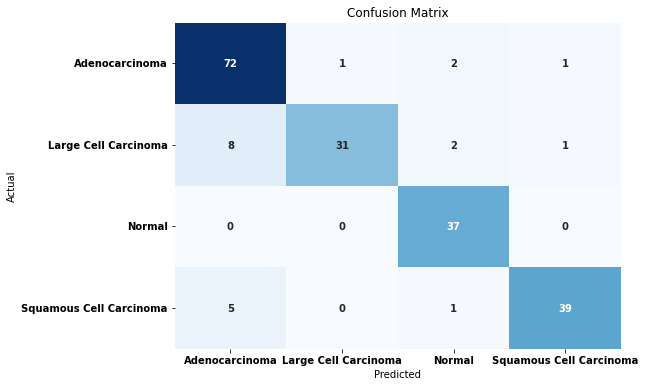

Epoch 1/30
25/25 [==============================] - 56s 2s/step - loss: 1.3746 - accuracy: 0.2975
Epoch 2/30
25/25 [==============================] - 52s 2s/step - loss: 1.3478 - accuracy: 0.3438
Epoch 3/30
25/25 [==============================] - 53s 2s/step - loss: 1.2335 - accuracy: 0.4563
Epoch 4/30
25/25 [==============================] - 54s 2s/step - loss: 1.0510 - accuracy: 0.5088
Epoch 5/30
25/25 [==============================] - 53s 2s/step - loss: 0.9743 - accuracy: 0.5525
Epoch 6/30
25/25 [==============================] - 49s 2s/step - loss: 0.8894 - accuracy: 0.6162
Epoch 7/30
25/25 [==============================] - 53s 2s/step - loss: 0.8160 - accuracy: 0.6425
Epoch 8/30
25/25 [==============================] - 54s 2s/step - loss: 0.7404 - accuracy: 0.6725
Epoch 9/30
25/25 [==============================] - 52s 2s/step - loss: 0.6751 - accuracy: 0.7225
Epoch 10/30
25/25 [==============================] - 53s 2s/step - loss: 0.5854 - accuracy: 0.7575
Epoch 11/30
25/25 [

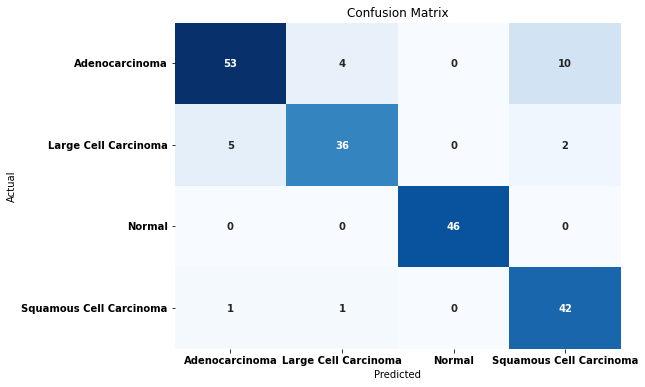

Epoch 1/30
25/25 [==============================] - 54s 2s/step - loss: 1.3627 - accuracy: 0.3262
Epoch 2/30
25/25 [==============================] - 52s 2s/step - loss: 1.2588 - accuracy: 0.4512
Epoch 3/30
25/25 [==============================] - 50s 2s/step - loss: 1.0792 - accuracy: 0.4963
Epoch 4/30
25/25 [==============================] - 52s 2s/step - loss: 0.9798 - accuracy: 0.5625
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 0.8953 - accuracy: 0.6012
Epoch 6/30
25/25 [==============================] - 51s 2s/step - loss: 0.8266 - accuracy: 0.6450
Epoch 7/30
25/25 [==============================] - 52s 2s/step - loss: 0.7516 - accuracy: 0.6775
Epoch 8/30
25/25 [==============================] - 50s 2s/step - loss: 0.6926 - accuracy: 0.7150
Epoch 9/30
25/25 [==============================] - 54s 2s/step - loss: 0.6095 - accuracy: 0.7500
Epoch 10/30
25/25 [==============================] - 53s 2s/step - loss: 0.5261 - accuracy: 0.7962
Epoch 11/30
25/25 [

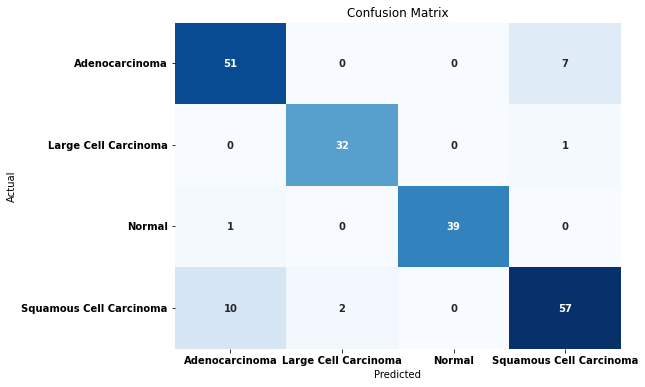

Epoch 1/30
25/25 [==============================] - 55s 2s/step - loss: 1.3615 - accuracy: 0.3187
Epoch 2/30
25/25 [==============================] - 52s 2s/step - loss: 1.2906 - accuracy: 0.4013
Epoch 3/30
25/25 [==============================] - 53s 2s/step - loss: 1.1315 - accuracy: 0.4787
Epoch 4/30
25/25 [==============================] - 53s 2s/step - loss: 0.9585 - accuracy: 0.6025
Epoch 5/30
25/25 [==============================] - 52s 2s/step - loss: 0.7958 - accuracy: 0.6775
Epoch 6/30
25/25 [==============================] - 50s 2s/step - loss: 0.6859 - accuracy: 0.7225
Epoch 7/30
25/25 [==============================] - 53s 2s/step - loss: 0.5342 - accuracy: 0.7950
Epoch 8/30
25/25 [==============================] - 55s 2s/step - loss: 0.4225 - accuracy: 0.8275
Epoch 9/30
25/25 [==============================] - 53s 2s/step - loss: 0.3648 - accuracy: 0.8512
Epoch 10/30
25/25 [==============================] - 52s 2s/step - loss: 0.2841 - accuracy: 0.9050
Epoch 11/30
25/25 [

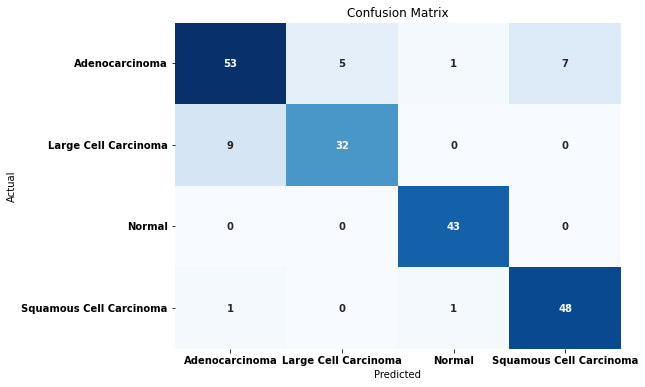

Accuracy List: [0.92, 0.895, 0.885, 0.895, 0.88]
Precision List: [0.9216666666666667, 0.9023204336612695, 0.8908238023058197, 0.8963809662822945, 0.8785426075426075]
Recall List: [0.92, 0.895, 0.885, 0.895, 0.88]
F1 List: [0.9205854885057471, 0.8931826290258283, 0.8846825396825397, 0.8950877574154543, 0.8780529838378677]
AUC List: [0.9881750603042642, 0.9891172344023221, 0.984434200790331, 0.9852096363434445, 0.9752021920853458]
Average Test Accuracy: 0.8950000000000001
Average Precision: 0.8979468952917316
Average Recall: 0.8950000000000001
Average F1 Score: 0.8943182796934874
Average AUC Score: 0.9844276647851415


In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Add, GlobalAveragePooling2D, GlobalMaxPooling2D, Activation, Multiply
from tensorflow.keras.models import Model
from sklearn.utils import shuffle
def spatial_attention_block(C_A):
    x = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(C_A)
    y = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(C_A)
    
    x = Concatenate()([x, y])
    x = Activation('relu')(x)
    x = Conv2D(1, 1, padding='same')(x)
    x = Activation('sigmoid')(x)
    S_A = Multiply()([x, C_A])
    
    return S_A

def self_attention(inp):
    shp = inp.shape
    a = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    a = Activation('relu')(a)
    
    b = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    b = Activation('relu')(b)
    
    c = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    c = Activation('relu')(c)
    
    a = Reshape((shp[1] * shp[2], shp[3] // 8))(a)
    b = Reshape((shp[1] * shp[2], shp[3] // 8))(b)
    b = K.permute_dimensions(b, (0, 2, 1))
    c = Reshape((shp[1] * shp[2], shp[3] // 8))(c)
    inter = K.batch_dot(a, b)
    inter = Activation('softmax')(inter)
    out = K.batch_dot(inter, c)
    out = Reshape((shp[1], shp[2], shp[3] // 8))(out)
    out = Conv2D(shp[3], 1, padding='same')(out)
    out = Activation('relu')(out)
    
    return out

def SqueezeAndExcitation(inputs, ratio=8):
    b, _, _, c = K.int_shape(inputs)
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(c // ratio, activation="relu", use_bias=False)(x)
    x = Dense(c, activation="sigmoid", use_bias=False)(x)
    x = Multiply()([inputs, x])
    return x


def channel_attention(inputs):
    shape = K.int_shape(inputs)
    x = MaxPooling2D(pool_size=(shape[1], shape[2]))(inputs)
    x = Conv2D(shape[3] // 8, 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('relu')(x)
    x = Conv2D(shape[3], 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('sigmoid')(x)
    x = Multiply()([x, inputs])
    
    return x

def create_lightweight_cnn(input_shape,num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = AveragePooling2D((2, 2))(x)  # Average pooling layer added
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    a31 = self_attention(x)
    a32 = spatial_attention_block(x)
    a3 = Add()([a31, a32])
    x = channel_attention(a3)
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(4, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

 

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined create_lightweight_cnn and X, y
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
num_classes = 4  # Example number of classes
input_shape = (224, 224, 3)  # Example input shape (height, width, channels)
k = 5  # Number of folds for cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
specificity_list = []  # New list for specificity

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the model
    model = create_lightweight_cnn(input_shape, num_classes)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=30)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate and store metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    auc = roc_auc_score(y_true_classes, y_pred, multi_class='ovo')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    
    
    # Append metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

    # Display the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'], 
                yticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'],
                annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Set labels to bold
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    plt.show()

# Calculate the average of the individual metrics
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)

print("Accuracy List:", accuracy_list)
print("Precision List:", precision_list)
print("Recall List:", recall_list)
print("F1 List:", f1_list)
print("AUC List:", auc_list)

# Print the average metrics
print("Average Test Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print("Average AUC Score:", average_auc)



**Nadam,lr=0.00001**

Epoch 1/30
25/25 [==============================] - 44s 1s/step - loss: 1.3802 - accuracy: 0.3038
Epoch 2/30
25/25 [==============================] - 36s 1s/step - loss: 1.3690 - accuracy: 0.3338
Epoch 3/30
25/25 [==============================] - 37s 1s/step - loss: 1.3586 - accuracy: 0.3338
Epoch 4/30
25/25 [==============================] - 37s 1s/step - loss: 1.3508 - accuracy: 0.3338
Epoch 5/30
25/25 [==============================] - 36s 1s/step - loss: 1.3434 - accuracy: 0.3500
Epoch 6/30
25/25 [==============================] - 37s 1s/step - loss: 1.3327 - accuracy: 0.3462
Epoch 7/30
25/25 [==============================] - 36s 1s/step - loss: 1.3179 - accuracy: 0.3688
Epoch 8/30
25/25 [==============================] - 35s 1s/step - loss: 1.3008 - accuracy: 0.3800
Epoch 9/30
25/25 [==============================] - 35s 1s/step - loss: 1.2801 - accuracy: 0.4125
Epoch 10/30
25/25 [==============================] - 36s 1s/step - loss: 1.2504 - accuracy: 0.4300
Epoch 11/30
25/25 [

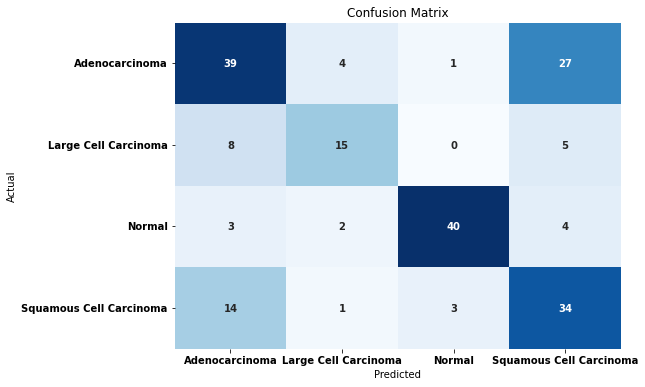

Epoch 1/30
25/25 [==============================] - 57s 2s/step - loss: 1.3842 - accuracy: 0.3063
Epoch 2/30
25/25 [==============================] - 48s 2s/step - loss: 1.3771 - accuracy: 0.3275
Epoch 3/30
25/25 [==============================] - 52s 2s/step - loss: 1.3673 - accuracy: 0.3275
Epoch 4/30
25/25 [==============================] - 49s 2s/step - loss: 1.3577 - accuracy: 0.3275
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 1.3501 - accuracy: 0.3275
Epoch 6/30
25/25 [==============================] - 52s 2s/step - loss: 1.3416 - accuracy: 0.3450
Epoch 7/30
25/25 [==============================] - 50s 2s/step - loss: 1.3299 - accuracy: 0.3587
Epoch 8/30
25/25 [==============================] - 48s 2s/step - loss: 1.3141 - accuracy: 0.4137
Epoch 9/30
25/25 [==============================] - 50s 2s/step - loss: 1.2939 - accuracy: 0.4200
Epoch 10/30
25/25 [==============================] - 51s 2s/step - loss: 1.2635 - accuracy: 0.4400
Epoch 11/30
25/25 [

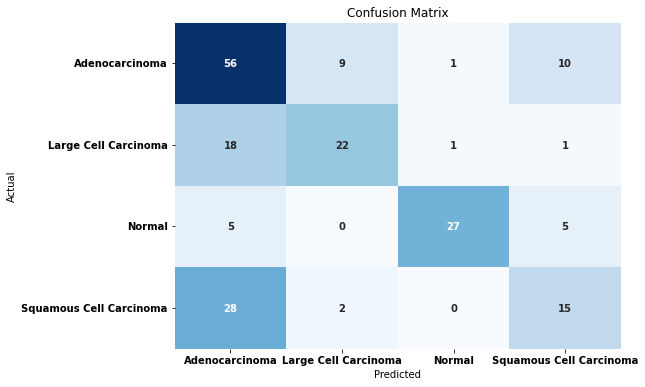

Epoch 1/30
25/25 [==============================] - 53s 2s/step - loss: 1.3839 - accuracy: 0.3050
Epoch 2/30
25/25 [==============================] - 48s 2s/step - loss: 1.3769 - accuracy: 0.3388
Epoch 3/30
25/25 [==============================] - 51s 2s/step - loss: 1.3663 - accuracy: 0.3388
Epoch 4/30
25/25 [==============================] - 51s 2s/step - loss: 1.3537 - accuracy: 0.3388
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 1.3453 - accuracy: 0.3388
Epoch 6/30
25/25 [==============================] - 50s 2s/step - loss: 1.3374 - accuracy: 0.3388
Epoch 7/30
25/25 [==============================] - 49s 2s/step - loss: 1.3288 - accuracy: 0.3537
Epoch 8/30
25/25 [==============================] - 48s 2s/step - loss: 1.3177 - accuracy: 0.3663
Epoch 9/30
25/25 [==============================] - 51s 2s/step - loss: 1.3017 - accuracy: 0.3850
Epoch 10/30
25/25 [==============================] - 51s 2s/step - loss: 1.2833 - accuracy: 0.4050
Epoch 11/30
25/25 [

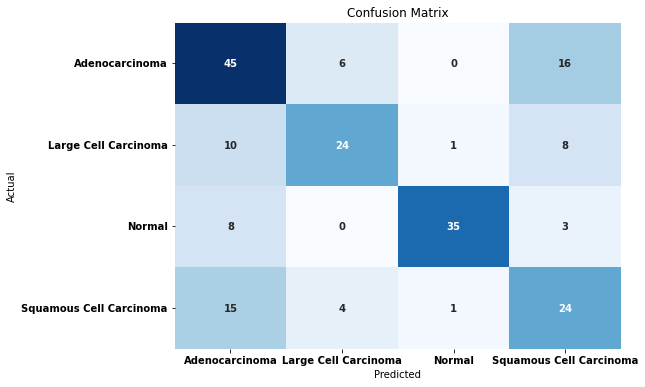

Epoch 1/30
25/25 [==============================] - 62s 2s/step - loss: 1.3842 - accuracy: 0.3075
Epoch 2/30
25/25 [==============================] - 48s 2s/step - loss: 1.3754 - accuracy: 0.3500
Epoch 3/30
25/25 [==============================] - 49s 2s/step - loss: 1.3623 - accuracy: 0.3500
Epoch 4/30
25/25 [==============================] - 50s 2s/step - loss: 1.3471 - accuracy: 0.3500
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 1.3341 - accuracy: 0.3663
Epoch 6/30
25/25 [==============================] - 51s 2s/step - loss: 1.3171 - accuracy: 0.4025
Epoch 7/30
25/25 [==============================] - 52s 2s/step - loss: 1.2922 - accuracy: 0.4200
Epoch 8/30
25/25 [==============================] - 50s 2s/step - loss: 1.2562 - accuracy: 0.4512
Epoch 9/30
25/25 [==============================] - 48s 2s/step - loss: 1.2090 - accuracy: 0.4600
Epoch 10/30
25/25 [==============================] - 51s 2s/step - loss: 1.1628 - accuracy: 0.4725
Epoch 11/30
25/25 [

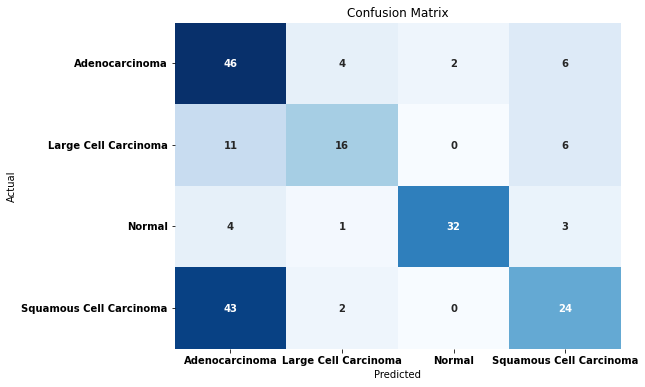

Epoch 1/30
25/25 [==============================] - 51s 2s/step - loss: 1.3784 - accuracy: 0.3413
Epoch 2/30
25/25 [==============================] - 49s 2s/step - loss: 1.3637 - accuracy: 0.3400
Epoch 3/30
25/25 [==============================] - 49s 2s/step - loss: 1.3551 - accuracy: 0.3400
Epoch 4/30
25/25 [==============================] - 49s 2s/step - loss: 1.3501 - accuracy: 0.3400
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 1.3436 - accuracy: 0.3400
Epoch 6/30
25/25 [==============================] - 49s 2s/step - loss: 1.3351 - accuracy: 0.3450
Epoch 7/30
25/25 [==============================] - 50s 2s/step - loss: 1.3261 - accuracy: 0.3688
Epoch 8/30
25/25 [==============================] - 49s 2s/step - loss: 1.3171 - accuracy: 0.3775
Epoch 9/30
25/25 [==============================] - 49s 2s/step - loss: 1.3020 - accuracy: 0.3963
Epoch 10/30
25/25 [==============================] - 49s 2s/step - loss: 1.2866 - accuracy: 0.4087
Epoch 11/30
25/25 [

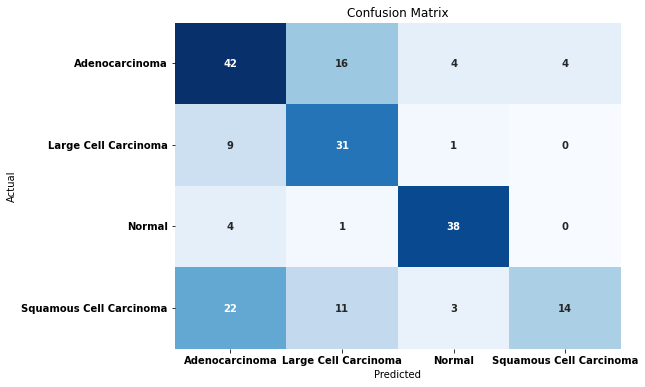

Accuracy List: [0.64, 0.6, 0.64, 0.59, 0.625]
Precision List: [0.6607956574675324, 0.6199908517251775, 0.6661309159838572, 0.6435948258902223, 0.659765004503398]
Recall List: [0.64, 0.6, 0.64, 0.59, 0.625]
F1 List: [0.6447818320700394, 0.5959477318482495, 0.6470908068600326, 0.5852833786167119, 0.6074828359347195]
AUC List: [0.8688711941981558, 0.8643165878911493, 0.851741442159549, 0.8793513912235803, 0.8798386445280943]
Average Test Accuracy: 0.619
Average Precision: 0.6500554511140375
Average Recall: 0.619
Average F1 Score: 0.6161173170659506
Average AUC Score: 0.8688238520001057


In [17]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Add, GlobalAveragePooling2D, GlobalMaxPooling2D, Activation, Multiply
from tensorflow.keras.models import Model
from sklearn.utils import shuffle
def spatial_attention_block(C_A):
    x = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(C_A)
    y = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(C_A)
    
    x = Concatenate()([x, y])
    x = Activation('relu')(x)
    x = Conv2D(1, 1, padding='same')(x)
    x = Activation('sigmoid')(x)
    S_A = Multiply()([x, C_A])
    
    return S_A

def self_attention(inp):
    shp = inp.shape
    a = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    a = Activation('relu')(a)
    
    b = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    b = Activation('relu')(b)
    
    c = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    c = Activation('relu')(c)
    
    a = Reshape((shp[1] * shp[2], shp[3] // 8))(a)
    b = Reshape((shp[1] * shp[2], shp[3] // 8))(b)
    b = K.permute_dimensions(b, (0, 2, 1))
    c = Reshape((shp[1] * shp[2], shp[3] // 8))(c)
    inter = K.batch_dot(a, b)
    inter = Activation('softmax')(inter)
    out = K.batch_dot(inter, c)
    out = Reshape((shp[1], shp[2], shp[3] // 8))(out)
    out = Conv2D(shp[3], 1, padding='same')(out)
    out = Activation('relu')(out)
    
    return out

def SqueezeAndExcitation(inputs, ratio=8):
    b, _, _, c = K.int_shape(inputs)
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(c // ratio, activation="relu", use_bias=False)(x)
    x = Dense(c, activation="sigmoid", use_bias=False)(x)
    x = Multiply()([inputs, x])
    return x


def channel_attention(inputs):
    shape = K.int_shape(inputs)
    x = MaxPooling2D(pool_size=(shape[1], shape[2]))(inputs)
    x = Conv2D(shape[3] // 8, 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('relu')(x)
    x = Conv2D(shape[3], 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('sigmoid')(x)
    x = Multiply()([x, inputs])
    
    return x

def create_lightweight_cnn(input_shape,num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = AveragePooling2D((2, 2))(x)  # Average pooling layer added
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    a31 = self_attention(x)
    a32 = spatial_attention_block(x)
    a3 = Add()([a31, a32])
    x = channel_attention(a3)
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(4, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

 

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined create_lightweight_cnn and X, y
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
num_classes = 4  # Example number of classes
input_shape = (224, 224, 3)  # Example input shape (height, width, channels)
k = 5  # Number of folds for cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
specificity_list = []  # New list for specificity

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the model
    model = create_lightweight_cnn(input_shape, num_classes)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=30)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate and store metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    auc = roc_auc_score(y_true_classes, y_pred, multi_class='ovo')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    
    
    # Append metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

    # Display the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'], 
                yticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'],
                annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Set labels to bold
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    plt.show()

# Calculate the average of the individual metrics
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)

print("Accuracy List:", accuracy_list)
print("Precision List:", precision_list)
print("Recall List:", recall_list)
print("F1 List:", f1_list)
print("AUC List:", auc_list)

# Print the average metrics
print("Average Test Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print("Average AUC Score:", average_auc)



**Nadam,Mean Square error**

Epoch 1/30
25/25 [==============================] - 139s 2s/step - loss: 0.1864 - accuracy: 0.3288
Epoch 2/30
25/25 [==============================] - 37s 1s/step - loss: 0.1808 - accuracy: 0.3562
Epoch 3/30
25/25 [==============================] - 37s 1s/step - loss: 0.1505 - accuracy: 0.4975
Epoch 4/30
25/25 [==============================] - 36s 1s/step - loss: 0.1258 - accuracy: 0.6125
Epoch 5/30
25/25 [==============================] - 37s 1s/step - loss: 0.0890 - accuracy: 0.7387
Epoch 6/30
25/25 [==============================] - 36s 1s/step - loss: 0.0661 - accuracy: 0.8275
Epoch 7/30
25/25 [==============================] - 38s 1s/step - loss: 0.0511 - accuracy: 0.8650
Epoch 8/30
25/25 [==============================] - 35s 1s/step - loss: 0.0349 - accuracy: 0.9100
Epoch 9/30
25/25 [==============================] - 37s 1s/step - loss: 0.0301 - accuracy: 0.9225
Epoch 10/30
25/25 [==============================] - 36s 1s/step - loss: 0.0277 - accuracy: 0.9262
Epoch 11/30
25/25 

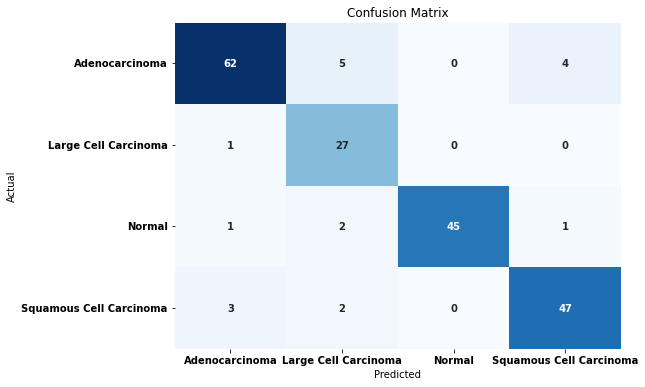

Epoch 1/30
25/25 [==============================] - 67s 2s/step - loss: 0.1938 - accuracy: 0.3187
Epoch 2/30
25/25 [==============================] - 55s 2s/step - loss: 0.1781 - accuracy: 0.3713
Epoch 3/30
25/25 [==============================] - 52s 2s/step - loss: 0.1423 - accuracy: 0.4925
Epoch 4/30
25/25 [==============================] - 53s 2s/step - loss: 0.1173 - accuracy: 0.6463
Epoch 5/30
25/25 [==============================] - 53s 2s/step - loss: 0.1029 - accuracy: 0.7025
Epoch 6/30
25/25 [==============================] - 53s 2s/step - loss: 0.0754 - accuracy: 0.7812
Epoch 7/30
25/25 [==============================] - 54s 2s/step - loss: 0.0595 - accuracy: 0.8363
Epoch 8/30
25/25 [==============================] - 55s 2s/step - loss: 0.0461 - accuracy: 0.8763
Epoch 9/30
25/25 [==============================] - 53s 2s/step - loss: 0.0308 - accuracy: 0.9175
Epoch 10/30
25/25 [==============================] - 52s 2s/step - loss: 0.0255 - accuracy: 0.9300
Epoch 11/30
25/25 [

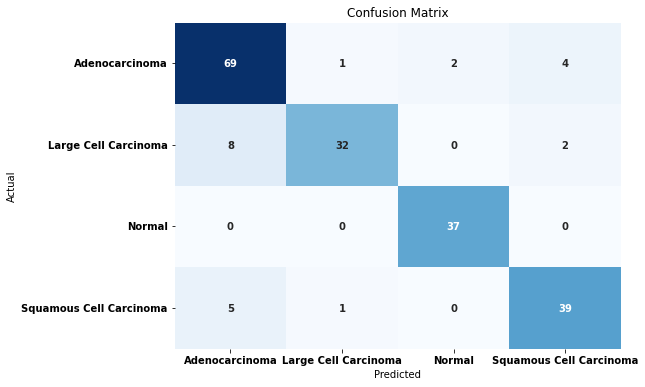

Epoch 1/30
25/25 [==============================] - 67s 2s/step - loss: 0.1837 - accuracy: 0.3150
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 0.1681 - accuracy: 0.4212
Epoch 3/30
25/25 [==============================] - 52s 2s/step - loss: 0.1462 - accuracy: 0.5275
Epoch 4/30
25/25 [==============================] - 51s 2s/step - loss: 0.1363 - accuracy: 0.5800
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 0.0956 - accuracy: 0.7312
Epoch 6/30
25/25 [==============================] - 52s 2s/step - loss: 0.0699 - accuracy: 0.8025
Epoch 7/30
25/25 [==============================] - 48s 2s/step - loss: 0.0549 - accuracy: 0.8612
Epoch 8/30
25/25 [==============================] - 53s 2s/step - loss: 0.0458 - accuracy: 0.8788
Epoch 9/30
25/25 [==============================] - 51s 2s/step - loss: 0.0312 - accuracy: 0.9187
Epoch 10/30
25/25 [==============================] - 53s 2s/step - loss: 0.0193 - accuracy: 0.9525
Epoch 11/30
25/25 [

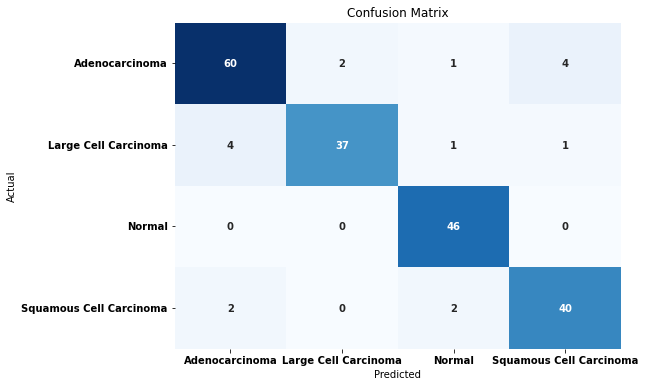

Epoch 1/30
25/25 [==============================] - 56s 2s/step - loss: 0.1854 - accuracy: 0.3300
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 0.1585 - accuracy: 0.4500
Epoch 3/30
25/25 [==============================] - 55s 2s/step - loss: 0.1403 - accuracy: 0.5362
Epoch 4/30
25/25 [==============================] - 54s 2s/step - loss: 0.1039 - accuracy: 0.6938
Epoch 5/30
25/25 [==============================] - 52s 2s/step - loss: 0.0840 - accuracy: 0.7625
Epoch 6/30
25/25 [==============================] - 50s 2s/step - loss: 0.0645 - accuracy: 0.8300
Epoch 7/30
25/25 [==============================] - 50s 2s/step - loss: 0.0558 - accuracy: 0.8425
Epoch 8/30
25/25 [==============================] - 50s 2s/step - loss: 0.0453 - accuracy: 0.8800
Epoch 9/30
25/25 [==============================] - 50s 2s/step - loss: 0.0312 - accuracy: 0.9212
Epoch 10/30
25/25 [==============================] - 48s 2s/step - loss: 0.0268 - accuracy: 0.9275
Epoch 11/30
25/25 [

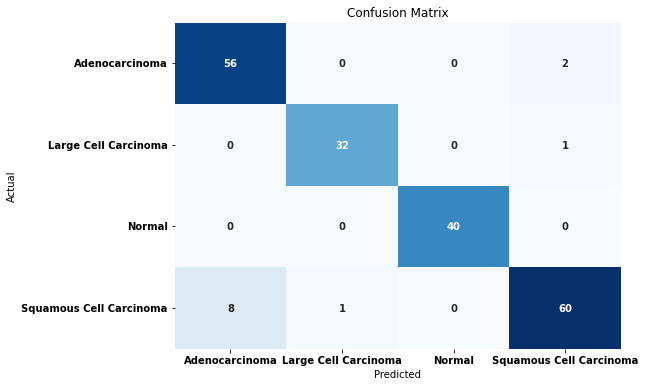

Epoch 1/30
25/25 [==============================] - 62s 2s/step - loss: 0.1859 - accuracy: 0.3462
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 0.1678 - accuracy: 0.4288
Epoch 3/30
25/25 [==============================] - 54s 2s/step - loss: 0.1291 - accuracy: 0.5888
Epoch 4/30
25/25 [==============================] - 50s 2s/step - loss: 0.1051 - accuracy: 0.6925
Epoch 5/30
25/25 [==============================] - 53s 2s/step - loss: 0.0735 - accuracy: 0.8037
Epoch 6/30
25/25 [==============================] - 52s 2s/step - loss: 0.0560 - accuracy: 0.8525
Epoch 7/30
25/25 [==============================] - 52s 2s/step - loss: 0.0457 - accuracy: 0.8800
Epoch 8/30
25/25 [==============================] - 53s 2s/step - loss: 0.0359 - accuracy: 0.9013
Epoch 9/30
25/25 [==============================] - 55s 2s/step - loss: 0.0219 - accuracy: 0.9463
Epoch 10/30
25/25 [==============================] - 51s 2s/step - loss: 0.0201 - accuracy: 0.9463
Epoch 11/30
25/25 [

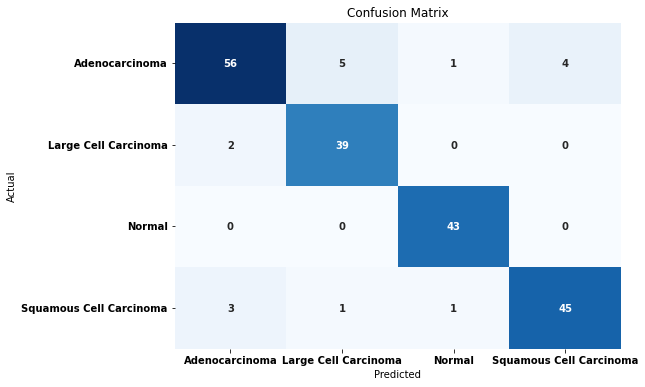

Accuracy List: [0.905, 0.885, 0.915, 0.94, 0.915]
Precision List: [0.913507462686567, 0.8879159768973256, 0.9156753690753691, 0.9423214285714286, 0.9156537675179363]
Recall List: [0.905, 0.885, 0.915, 0.94, 0.915]
F1 List: [0.9066849753314833, 0.8838724183877414, 0.9144495049970774, 0.9398658718330849, 0.9143402182417472]
AUC List: [0.9739097029850479, 0.9736650105619402, 0.9826097374717552, 0.9933175930973906, 0.9803135008622815]
Average Test Accuracy: 0.9120000000000001
Average Precision: 0.9150148009497254
Average Recall: 0.9120000000000001
Average F1 Score: 0.911842597758227
Average AUC Score: 0.980763108995683


In [35]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Add, GlobalAveragePooling2D, GlobalMaxPooling2D, Activation, Multiply
from tensorflow.keras.models import Model
from sklearn.utils import shuffle
def spatial_attention_block(C_A):
    x = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(C_A)
    y = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(C_A)
    
    x = Concatenate()([x, y])
    x = Activation('relu')(x)
    x = Conv2D(1, 1, padding='same')(x)
    x = Activation('sigmoid')(x)
    S_A = Multiply()([x, C_A])
    
    return S_A

def self_attention(inp):
    shp = inp.shape
    a = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    a = Activation('relu')(a)
    
    b = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    b = Activation('relu')(b)
    
    c = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    c = Activation('relu')(c)
    
    a = Reshape((shp[1] * shp[2], shp[3] // 8))(a)
    b = Reshape((shp[1] * shp[2], shp[3] // 8))(b)
    b = K.permute_dimensions(b, (0, 2, 1))
    c = Reshape((shp[1] * shp[2], shp[3] // 8))(c)
    inter = K.batch_dot(a, b)
    inter = Activation('softmax')(inter)
    out = K.batch_dot(inter, c)
    out = Reshape((shp[1], shp[2], shp[3] // 8))(out)
    out = Conv2D(shp[3], 1, padding='same')(out)
    out = Activation('relu')(out)
    
    return out

def SqueezeAndExcitation(inputs, ratio=8):
    b, _, _, c = K.int_shape(inputs)
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(c // ratio, activation="relu", use_bias=False)(x)
    x = Dense(c, activation="sigmoid", use_bias=False)(x)
    x = Multiply()([inputs, x])
    return x


def channel_attention(inputs):
    shape = K.int_shape(inputs)
    x = MaxPooling2D(pool_size=(shape[1], shape[2]))(inputs)
    x = Conv2D(shape[3] // 8, 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('relu')(x)
    x = Conv2D(shape[3], 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('sigmoid')(x)
    x = Multiply()([x, inputs])
    
    return x

def create_lightweight_cnn(input_shape,num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = AveragePooling2D((2, 2))(x)  # Average pooling layer added
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    a31 = self_attention(x)
    a32 = spatial_attention_block(x)
    a3 = Add()([a31, a32])
    x = channel_attention(a3)
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(4, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

 

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined create_lightweight_cnn and X, y
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
num_classes = 4  # Example number of classes
input_shape = (224, 224, 3)  # Example input shape (height, width, channels)
k = 5  # Number of folds for cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
specificity_list = []  # New list for specificity

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the model
    model = create_lightweight_cnn(input_shape, num_classes)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=30)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate and store metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    auc = roc_auc_score(y_true_classes, y_pred, multi_class='ovo')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    
    
    # Append metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

    # Display the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'], 
                yticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'],
                annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Set labels to bold
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    plt.show()

# Calculate the average of the individual metrics
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)

print("Accuracy List:", accuracy_list)
print("Precision List:", precision_list)
print("Recall List:", recall_list)
print("F1 List:", f1_list)
print("AUC List:", auc_list)

# Print the average metrics
print("Average Test Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print("Average AUC Score:", average_auc)



**Nadam,hinge loss**

Epoch 1/30
25/25 [==============================] - 49s 2s/step - loss: 1.0953 - accuracy: 0.3162
Epoch 2/30
25/25 [==============================] - 49s 2s/step - loss: 1.0831 - accuracy: 0.3338
Epoch 3/30
25/25 [==============================] - 49s 2s/step - loss: 1.0831 - accuracy: 0.3338
Epoch 4/30
25/25 [==============================] - 53s 2s/step - loss: 1.0831 - accuracy: 0.3338
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 1.0831 - accuracy: 0.3338
Epoch 6/30
25/25 [==============================] - 52s 2s/step - loss: 1.0831 - accuracy: 0.3338
Epoch 7/30
25/25 [==============================] - 49s 2s/step - loss: 1.0831 - accuracy: 0.3338
Epoch 8/30
25/25 [==============================] - 51s 2s/step - loss: 1.0831 - accuracy: 0.3338
Epoch 9/30
25/25 [==============================] - 52s 2s/step - loss: 1.0831 - accuracy: 0.3338
Epoch 10/30
25/25 [==============================] - 54s 2s/step - loss: 1.0831 - accuracy: 0.3338
Epoch 11/30
25/25 [

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


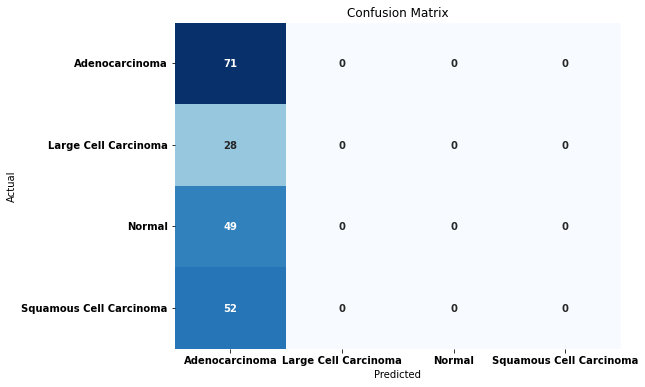

Epoch 1/30
25/25 [==============================] - 54s 2s/step - loss: 1.0967 - accuracy: 0.3113
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 1.0862 - accuracy: 0.3275
Epoch 3/30
25/25 [==============================] - 52s 2s/step - loss: 1.0862 - accuracy: 0.3275
Epoch 4/30
25/25 [==============================] - 52s 2s/step - loss: 1.0862 - accuracy: 0.3275
Epoch 5/30
25/25 [==============================] - 53s 2s/step - loss: 1.0862 - accuracy: 0.3275
Epoch 6/30
25/25 [==============================] - 51s 2s/step - loss: 1.0862 - accuracy: 0.3275
Epoch 7/30
25/25 [==============================] - 49s 2s/step - loss: 1.0862 - accuracy: 0.3275
Epoch 8/30
25/25 [==============================] - 50s 2s/step - loss: 1.0862 - accuracy: 0.3275
Epoch 9/30
25/25 [==============================] - 52s 2s/step - loss: 1.0862 - accuracy: 0.3275
Epoch 10/30
25/25 [==============================] - 51s 2s/step - loss: 1.0862 - accuracy: 0.3275
Epoch 11/30
25/25 [

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


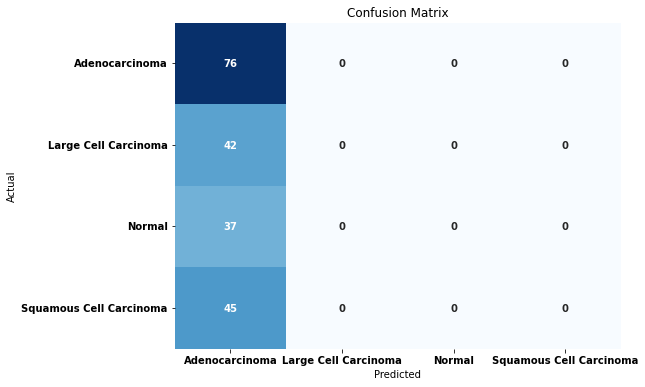

Epoch 1/30
25/25 [==============================] - 55s 2s/step - loss: 1.0847 - accuracy: 0.3388
Epoch 2/30
25/25 [==============================] - 52s 2s/step - loss: 1.0806 - accuracy: 0.3388
Epoch 3/30
25/25 [==============================] - 52s 2s/step - loss: 1.0806 - accuracy: 0.3388
Epoch 4/30
25/25 [==============================] - 53s 2s/step - loss: 1.0806 - accuracy: 0.3388
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 1.0806 - accuracy: 0.3388
Epoch 6/30
25/25 [==============================] - 49s 2s/step - loss: 1.0806 - accuracy: 0.3388
Epoch 7/30
25/25 [==============================] - 52s 2s/step - loss: 1.0806 - accuracy: 0.3388
Epoch 8/30
25/25 [==============================] - 53s 2s/step - loss: 1.0806 - accuracy: 0.3388
Epoch 9/30
25/25 [==============================] - 52s 2s/step - loss: 1.0806 - accuracy: 0.3388
Epoch 10/30
25/25 [==============================] - 51s 2s/step - loss: 1.0806 - accuracy: 0.3388
Epoch 11/30
25/25 [

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


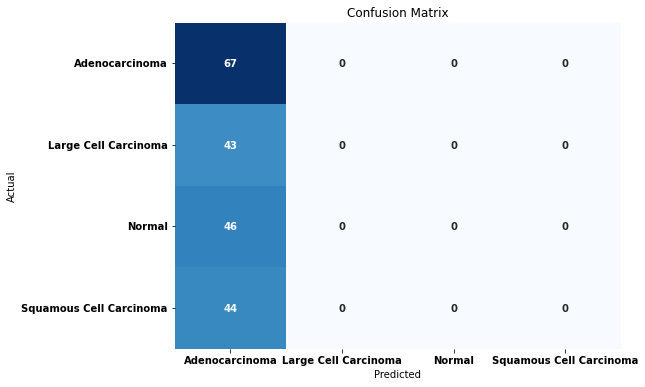

Epoch 1/30
25/25 [==============================] - 55s 2s/step - loss: 1.0793 - accuracy: 0.3438
Epoch 2/30
25/25 [==============================] - 50s 2s/step - loss: 1.0750 - accuracy: 0.3500
Epoch 3/30
25/25 [==============================] - 50s 2s/step - loss: 1.0750 - accuracy: 0.3500
Epoch 4/30
25/25 [==============================] - 54s 2s/step - loss: 1.0750 - accuracy: 0.3500
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 1.0750 - accuracy: 0.3500
Epoch 6/30
25/25 [==============================] - 52s 2s/step - loss: 1.0750 - accuracy: 0.3500
Epoch 7/30
25/25 [==============================] - 49s 2s/step - loss: 1.0750 - accuracy: 0.3500
Epoch 8/30
25/25 [==============================] - 50s 2s/step - loss: 1.0750 - accuracy: 0.3500
Epoch 9/30
25/25 [==============================] - 51s 2s/step - loss: 1.0750 - accuracy: 0.3500
Epoch 10/30
25/25 [==============================] - 49s 2s/step - loss: 1.0750 - accuracy: 0.3500
Epoch 11/30
25/25 [

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


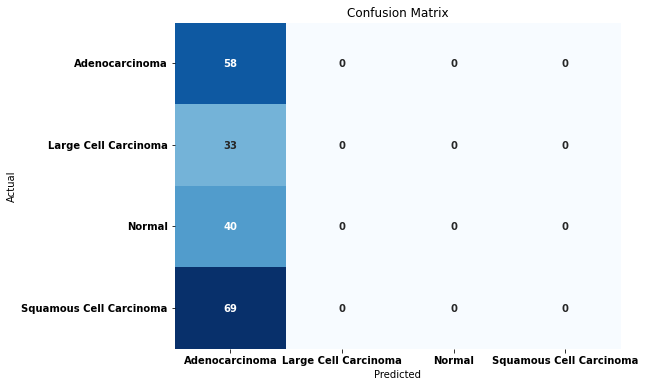

Epoch 1/30
25/25 [==============================] - 80s 2s/step - loss: 1.0868 - accuracy: 0.3262
Epoch 2/30
25/25 [==============================] - 52s 2s/step - loss: 1.0800 - accuracy: 0.3400
Epoch 3/30
25/25 [==============================] - 54s 2s/step - loss: 1.0800 - accuracy: 0.3400
Epoch 4/30
25/25 [==============================] - 54s 2s/step - loss: 1.0800 - accuracy: 0.3400
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 1.0800 - accuracy: 0.3400
Epoch 6/30
25/25 [==============================] - 52s 2s/step - loss: 1.0800 - accuracy: 0.3400
Epoch 7/30
25/25 [==============================] - 55s 2s/step - loss: 1.0800 - accuracy: 0.3400
Epoch 8/30
25/25 [==============================] - 52s 2s/step - loss: 1.0800 - accuracy: 0.3400
Epoch 9/30
25/25 [==============================] - 53s 2s/step - loss: 1.0800 - accuracy: 0.3400
Epoch 10/30
25/25 [==============================] - 55s 2s/step - loss: 1.0800 - accuracy: 0.3400
Epoch 11/30
25/25 [

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


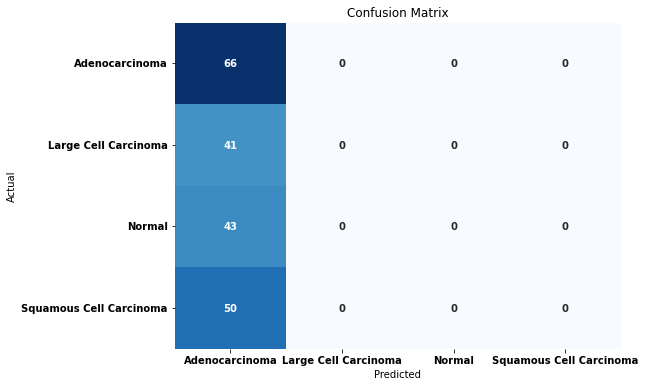

Accuracy List: [0.355, 0.38, 0.335, 0.29, 0.33]
Precision List: [0.126025, 0.1444, 0.112225, 0.08410000000000001, 0.10890000000000001]
Recall List: [0.355, 0.38, 0.335, 0.29, 0.33]
F1 List: [0.1860147601476015, 0.20927536231884059, 0.16812734082397005, 0.1303875968992248, 0.1637593984962406]
AUC List: [0.5, 0.5, 0.5, 0.5, 0.5]
Average Test Accuracy: 0.338
Average Precision: 0.11513000000000002
Average Recall: 0.338
Average F1 Score: 0.1715128917371755
Average AUC Score: 0.5


In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Add, GlobalAveragePooling2D, GlobalMaxPooling2D, Activation, Multiply
from tensorflow.keras.models import Model
from sklearn.utils import shuffle
def spatial_attention_block(C_A):
    x = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(C_A)
    y = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(C_A)
    
    x = Concatenate()([x, y])
    x = Activation('relu')(x)
    x = Conv2D(1, 1, padding='same')(x)
    x = Activation('sigmoid')(x)
    S_A = Multiply()([x, C_A])
    
    return S_A

def self_attention(inp):
    shp = inp.shape
    a = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    a = Activation('relu')(a)
    
    b = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    b = Activation('relu')(b)
    
    c = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    c = Activation('relu')(c)
    
    a = Reshape((shp[1] * shp[2], shp[3] // 8))(a)
    b = Reshape((shp[1] * shp[2], shp[3] // 8))(b)
    b = K.permute_dimensions(b, (0, 2, 1))
    c = Reshape((shp[1] * shp[2], shp[3] // 8))(c)
    inter = K.batch_dot(a, b)
    inter = Activation('softmax')(inter)
    out = K.batch_dot(inter, c)
    out = Reshape((shp[1], shp[2], shp[3] // 8))(out)
    out = Conv2D(shp[3], 1, padding='same')(out)
    out = Activation('relu')(out)
    
    return out

def SqueezeAndExcitation(inputs, ratio=8):
    b, _, _, c = K.int_shape(inputs)
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(c // ratio, activation="relu", use_bias=False)(x)
    x = Dense(c, activation="sigmoid", use_bias=False)(x)
    x = Multiply()([inputs, x])
    return x


def channel_attention(inputs):
    shape = K.int_shape(inputs)
    x = MaxPooling2D(pool_size=(shape[1], shape[2]))(inputs)
    x = Conv2D(shape[3] // 8, 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('relu')(x)
    x = Conv2D(shape[3], 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('sigmoid')(x)
    x = Multiply()([x, inputs])
    
    return x

def create_lightweight_cnn(input_shape,num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = AveragePooling2D((2, 2))(x)  # Average pooling layer added
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    a31 = self_attention(x)
    a32 = spatial_attention_block(x)
    a3 = Add()([a31, a32])
    x = channel_attention(a3)
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(4, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

 

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined create_lightweight_cnn and X, y
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
num_classes = 4  # Example number of classes
input_shape = (224, 224, 3)  # Example input shape (height, width, channels)
k = 5  # Number of folds for cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
specificity_list = []  # New list for specificity

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the model
    model = create_lightweight_cnn(input_shape, num_classes)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), loss='hinge', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=30)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate and store metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    auc = roc_auc_score(y_true_classes, y_pred, multi_class='ovo')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    
    
    # Append metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

    # Display the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'], 
                yticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'],
                annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Set labels to bold
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    plt.show()

# Calculate the average of the individual metrics
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)

print("Accuracy List:", accuracy_list)
print("Precision List:", precision_list)
print("Recall List:", recall_list)
print("F1 List:", f1_list)
print("AUC List:", auc_list)

# Print the average metrics
print("Average Test Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print("Average AUC Score:", average_auc)



**Nadam,Global Average Pooling instead of flatten layer**

Epoch 1/30
25/25 [==============================] - 52s 2s/step - loss: 1.3742 - accuracy: 0.3162
Epoch 2/30
25/25 [==============================] - 48s 2s/step - loss: 1.3665 - accuracy: 0.3375
Epoch 3/30
25/25 [==============================] - 48s 2s/step - loss: 1.3594 - accuracy: 0.3413
Epoch 4/30
25/25 [==============================] - 51s 2s/step - loss: 1.2668 - accuracy: 0.3963
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 1.1551 - accuracy: 0.4437
Epoch 6/30
25/25 [==============================] - 50s 2s/step - loss: 1.1374 - accuracy: 0.4525
Epoch 7/30
25/25 [==============================] - 50s 2s/step - loss: 1.0783 - accuracy: 0.4725
Epoch 8/30
25/25 [==============================] - 52s 2s/step - loss: 1.1321 - accuracy: 0.4638
Epoch 9/30
25/25 [==============================] - 46s 2s/step - loss: 1.0910 - accuracy: 0.4487
Epoch 10/30
25/25 [==============================] - 52s 2s/step - loss: 1.0399 - accuracy: 0.4825
Epoch 11/30
25/25 [

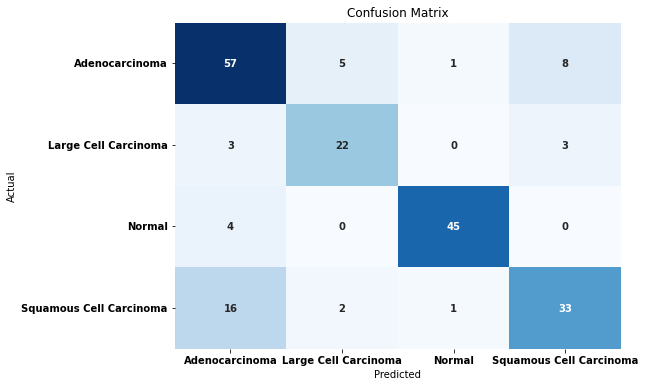

Epoch 1/30
25/25 [==============================] - 57s 2s/step - loss: 1.3736 - accuracy: 0.3162
Epoch 2/30
25/25 [==============================] - 50s 2s/step - loss: 1.3692 - accuracy: 0.3350
Epoch 3/30
25/25 [==============================] - 51s 2s/step - loss: 1.3646 - accuracy: 0.3162
Epoch 4/30
25/25 [==============================] - 52s 2s/step - loss: 1.2820 - accuracy: 0.3675
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 1.1207 - accuracy: 0.4588
Epoch 6/30
25/25 [==============================] - 52s 2s/step - loss: 1.0995 - accuracy: 0.4700
Epoch 7/30
25/25 [==============================] - 48s 2s/step - loss: 1.0217 - accuracy: 0.4787
Epoch 8/30
25/25 [==============================] - 52s 2s/step - loss: 0.9412 - accuracy: 0.5400
Epoch 9/30
25/25 [==============================] - 51s 2s/step - loss: 0.8718 - accuracy: 0.5675
Epoch 10/30
25/25 [==============================] - 51s 2s/step - loss: 0.8237 - accuracy: 0.6075
Epoch 11/30
25/25 [

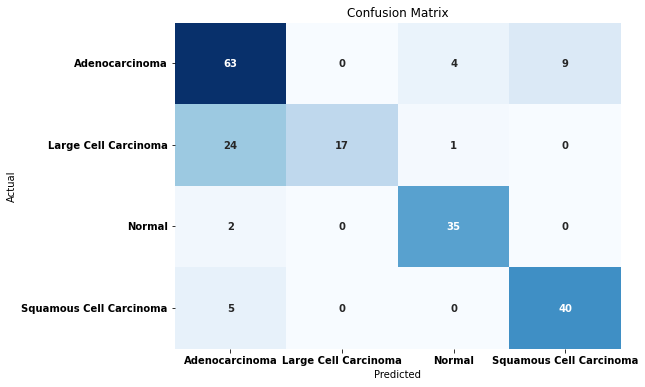

Epoch 1/30
25/25 [==============================] - 55s 2s/step - loss: 1.3713 - accuracy: 0.3388
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 1.3860 - accuracy: 0.3862
Epoch 3/30
25/25 [==============================] - 52s 2s/step - loss: 1.1732 - accuracy: 0.4512
Epoch 4/30
25/25 [==============================] - 50s 2s/step - loss: 1.2659 - accuracy: 0.4325
Epoch 5/30
25/25 [==============================] - 53s 2s/step - loss: 1.3687 - accuracy: 0.3313
Epoch 6/30
25/25 [==============================] - 50s 2s/step - loss: 1.3627 - accuracy: 0.3313
Epoch 7/30
25/25 [==============================] - 50s 2s/step - loss: 1.3557 - accuracy: 0.3388
Epoch 8/30
25/25 [==============================] - 53s 2s/step - loss: 1.3554 - accuracy: 0.3388
Epoch 9/30
25/25 [==============================] - 50s 2s/step - loss: 1.3527 - accuracy: 0.3487
Epoch 10/30
25/25 [==============================] - 52s 2s/step - loss: 1.3435 - accuracy: 0.3438
Epoch 11/30
25/25 [

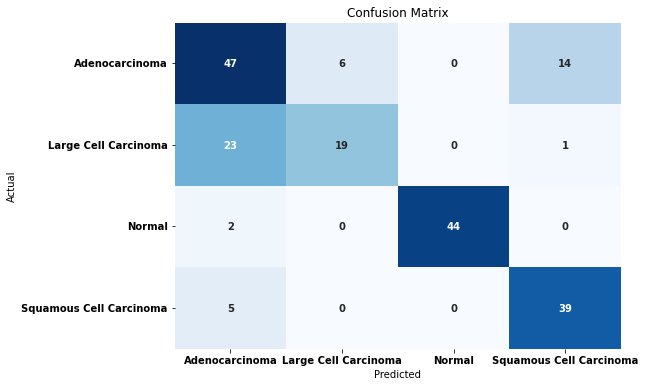

Epoch 1/30
25/25 [==============================] - 59s 2s/step - loss: 1.3682 - accuracy: 0.3350
Epoch 2/30
25/25 [==============================] - 50s 2s/step - loss: 1.2645 - accuracy: 0.4212
Epoch 3/30
25/25 [==============================] - 49s 2s/step - loss: 1.1226 - accuracy: 0.4775
Epoch 4/30
25/25 [==============================] - 50s 2s/step - loss: 1.1836 - accuracy: 0.4538
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 1.3691 - accuracy: 0.3500
Epoch 6/30
25/25 [==============================] - 51s 2s/step - loss: 1.3623 - accuracy: 0.3500
Epoch 7/30
25/25 [==============================] - 49s 2s/step - loss: 1.2634 - accuracy: 0.4112
Epoch 8/30
25/25 [==============================] - 50s 2s/step - loss: 1.1351 - accuracy: 0.4812
Epoch 9/30
25/25 [==============================] - 50s 2s/step - loss: 1.1306 - accuracy: 0.4775
Epoch 10/30
25/25 [==============================] - 50s 2s/step - loss: 1.1030 - accuracy: 0.4850
Epoch 11/30
25/25 [

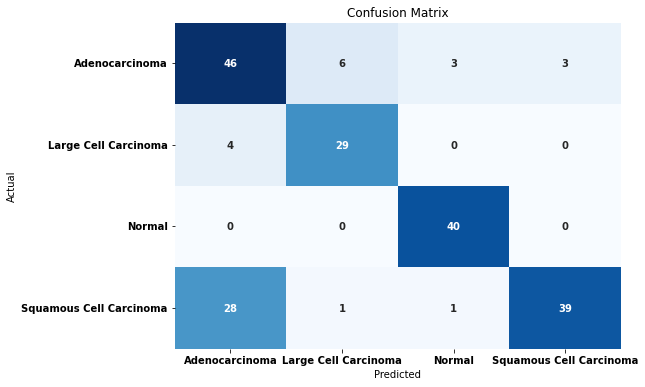

Epoch 1/30
25/25 [==============================] - 58s 2s/step - loss: 1.3730 - accuracy: 0.3262
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 1.3537 - accuracy: 0.3587
Epoch 3/30
25/25 [==============================] - 50s 2s/step - loss: 1.3635 - accuracy: 0.3400
Epoch 4/30
25/25 [==============================] - 51s 2s/step - loss: 1.3480 - accuracy: 0.3638
Epoch 5/30
25/25 [==============================] - 58s 2s/step - loss: 1.3348 - accuracy: 0.3663
Epoch 6/30
25/25 [==============================] - 55s 2s/step - loss: 1.3711 - accuracy: 0.3400
Epoch 7/30
25/25 [==============================] - 52s 2s/step - loss: 1.3675 - accuracy: 0.3400
Epoch 8/30
25/25 [==============================] - 50s 2s/step - loss: 1.3645 - accuracy: 0.3400
Epoch 9/30
25/25 [==============================] - 51s 2s/step - loss: 1.3609 - accuracy: 0.3400
Epoch 10/30
25/25 [==============================] - 50s 2s/step - loss: 1.3628 - accuracy: 0.3400
Epoch 11/30
25/25 [

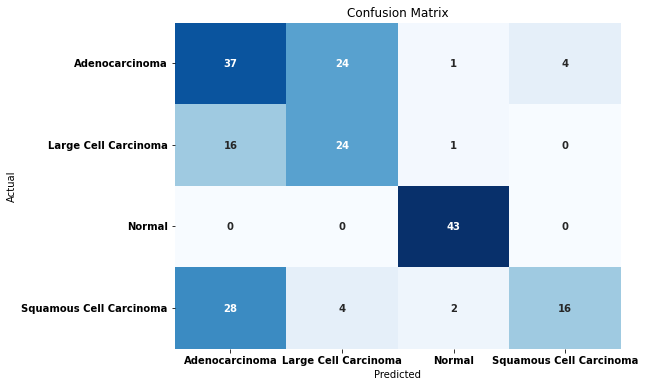

Accuracy List: [0.785, 0.775, 0.745, 0.77, 0.6]
Precision List: [0.7887188646368305, 0.8102293204515848, 0.7567694083694083, 0.8061176323676323, 0.6420582530156999]
Recall List: [0.785, 0.775, 0.745, 0.77, 0.6]
F1 List: [0.7845209204717091, 0.7623351878600175, 0.7388185440843005, 0.7677807456707713, 0.5916590593226537]
AUC List: [0.935884867025281, 0.945308074365092, 0.9262353865153505, 0.9531791553718091, 0.8763454883491754]
Average Test Accuracy: 0.7350000000000001
Average Precision: 0.7607786957682312
Average Recall: 0.7350000000000001
Average F1 Score: 0.7290228914818905
Average AUC Score: 0.9273905943253415


In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Add, GlobalAveragePooling2D, GlobalMaxPooling2D, Activation, Multiply
from tensorflow.keras.models import Model
from sklearn.utils import shuffle
def spatial_attention_block(C_A):
    x = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(C_A)
    y = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(C_A)
    
    x = Concatenate()([x, y])
    x = Activation('relu')(x)
    x = Conv2D(1, 1, padding='same')(x)
    x = Activation('sigmoid')(x)
    S_A = Multiply()([x, C_A])
    
    return S_A

def self_attention(inp):
    shp = inp.shape
    a = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    a = Activation('relu')(a)
    
    b = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    b = Activation('relu')(b)
    
    c = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    c = Activation('relu')(c)
    
    a = Reshape((shp[1] * shp[2], shp[3] // 8))(a)
    b = Reshape((shp[1] * shp[2], shp[3] // 8))(b)
    b = K.permute_dimensions(b, (0, 2, 1))
    c = Reshape((shp[1] * shp[2], shp[3] // 8))(c)
    inter = K.batch_dot(a, b)
    inter = Activation('softmax')(inter)
    out = K.batch_dot(inter, c)
    out = Reshape((shp[1], shp[2], shp[3] // 8))(out)
    out = Conv2D(shp[3], 1, padding='same')(out)
    out = Activation('relu')(out)
    
    return out

def SqueezeAndExcitation(inputs, ratio=8):
    b, _, _, c = K.int_shape(inputs)
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(c // ratio, activation="relu", use_bias=False)(x)
    x = Dense(c, activation="sigmoid", use_bias=False)(x)
    x = Multiply()([inputs, x])
    return x


def channel_attention(inputs):
    shape = K.int_shape(inputs)
    x = MaxPooling2D(pool_size=(shape[1], shape[2]))(inputs)
    x = Conv2D(shape[3] // 8, 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('relu')(x)
    x = Conv2D(shape[3], 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('sigmoid')(x)
    x = Multiply()([x, inputs])
    
    return x


def create_lightweight_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = AveragePooling2D((2, 2))(x)  # GlobalAveragePooling2D instead of Flatten
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    a31 = self_attention(x)
    a32 = spatial_attention_block(x)
    a3 = Add()([a31, a32])
    x = channel_attention(a3)
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = GlobalAveragePooling2D()(x)  # GlobalAveragePooling2D instead of Flatten
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)  # Using num_classes instead of hardcoded 4
    model = Model(inputs, outputs)
    return model

 

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined create_lightweight_cnn and X, y
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
num_classes = 4  # Example number of classes
input_shape = (224, 224, 3)  # Example input shape (height, width, channels)
k = 5  # Number of folds for cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the model
    model = create_lightweight_cnn(input_shape, num_classes)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=30)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate and store metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    auc = roc_auc_score(y_true_classes, y_pred, multi_class='ovo')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    
    # Append metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

    # Display the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'], 
                yticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'],
                annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Set labels to bold
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    plt.show()

# Calculate the average of the individual metrics
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)


print("Accuracy List:", accuracy_list)
print("Precision List:", precision_list)
print("Recall List:", recall_list)
print("F1 List:", f1_list)
print("AUC List:", auc_list)


# Print the average metrics
print("Average Test Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print("Average AUC Score:", average_auc)



**Nadam,Global MaxPooling instead of flatten layer**

Epoch 1/30
25/25 [==============================] - 54s 2s/step - loss: 1.3934 - accuracy: 0.3013
Epoch 2/30
25/25 [==============================] - 49s 2s/step - loss: 1.3667 - accuracy: 0.3338
Epoch 3/30
25/25 [==============================] - 50s 2s/step - loss: 1.3722 - accuracy: 0.3500
Epoch 4/30
25/25 [==============================] - 49s 2s/step - loss: 1.3575 - accuracy: 0.3338
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 1.2169 - accuracy: 0.4175
Epoch 6/30
25/25 [==============================] - 53s 2s/step - loss: 0.9416 - accuracy: 0.5725
Epoch 7/30
25/25 [==============================] - 49s 2s/step - loss: 0.7399 - accuracy: 0.6750
Epoch 8/30
25/25 [==============================] - 51s 2s/step - loss: 0.5585 - accuracy: 0.7700
Epoch 9/30
25/25 [==============================] - 51s 2s/step - loss: 0.4823 - accuracy: 0.8050
Epoch 10/30
25/25 [==============================] - 50s 2s/step - loss: 0.3574 - accuracy: 0.8575
Epoch 11/30
25/25 [

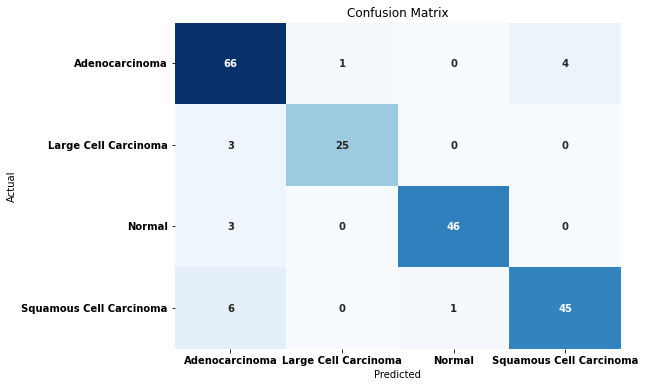

Epoch 1/30
25/25 [==============================] - 52s 2s/step - loss: 1.3773 - accuracy: 0.3075
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 1.3526 - accuracy: 0.3363
Epoch 3/30
25/25 [==============================] - 51s 2s/step - loss: 1.3509 - accuracy: 0.3375
Epoch 4/30
25/25 [==============================] - 51s 2s/step - loss: 1.3371 - accuracy: 0.3525
Epoch 5/30
25/25 [==============================] - 49s 2s/step - loss: 1.2153 - accuracy: 0.4412
Epoch 6/30
25/25 [==============================] - 49s 2s/step - loss: 1.0851 - accuracy: 0.5000
Epoch 7/30
25/25 [==============================] - 50s 2s/step - loss: 0.9369 - accuracy: 0.6025
Epoch 8/30
25/25 [==============================] - 51s 2s/step - loss: 0.7710 - accuracy: 0.7013
Epoch 9/30
25/25 [==============================] - 50s 2s/step - loss: 0.6737 - accuracy: 0.7200
Epoch 10/30
25/25 [==============================] - 51s 2s/step - loss: 0.5928 - accuracy: 0.7650
Epoch 11/30
25/25 [

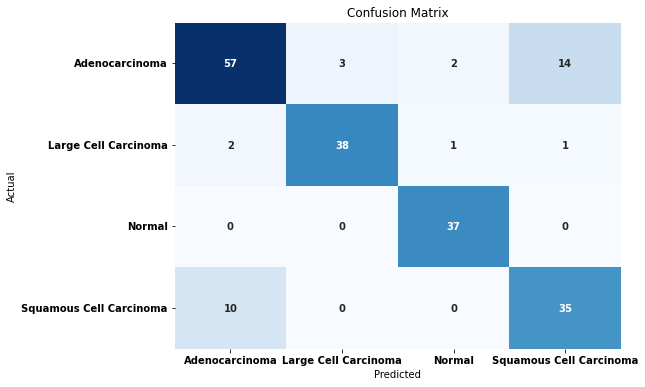

Epoch 1/30
25/25 [==============================] - 56s 2s/step - loss: 1.3673 - accuracy: 0.3187
Epoch 2/30
25/25 [==============================] - 50s 2s/step - loss: 1.3408 - accuracy: 0.3825
Epoch 3/30
25/25 [==============================] - 49s 2s/step - loss: 1.1462 - accuracy: 0.4575
Epoch 4/30
25/25 [==============================] - 48s 2s/step - loss: 1.0033 - accuracy: 0.5238
Epoch 5/30
25/25 [==============================] - 48s 2s/step - loss: 0.8337 - accuracy: 0.6137
Epoch 6/30
25/25 [==============================] - 50s 2s/step - loss: 0.7133 - accuracy: 0.7212
Epoch 7/30
25/25 [==============================] - 50s 2s/step - loss: 0.5227 - accuracy: 0.7775
Epoch 8/30
25/25 [==============================] - 52s 2s/step - loss: 0.3689 - accuracy: 0.8550
Epoch 9/30
25/25 [==============================] - 47s 2s/step - loss: 0.2122 - accuracy: 0.9187
Epoch 10/30
25/25 [==============================] - 50s 2s/step - loss: 1.1260 - accuracy: 0.5825
Epoch 11/30
25/25 [

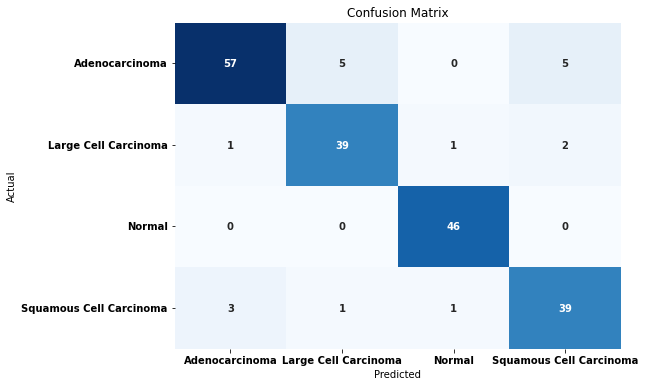

Epoch 1/30
25/25 [==============================] - 67s 2s/step - loss: 1.3741 - accuracy: 0.3338
Epoch 2/30
25/25 [==============================] - 52s 2s/step - loss: 1.3686 - accuracy: 0.3500
Epoch 3/30
25/25 [==============================] - 50s 2s/step - loss: 1.3650 - accuracy: 0.3500
Epoch 4/30
25/25 [==============================] - 50s 2s/step - loss: 1.3452 - accuracy: 0.3762
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 1.3652 - accuracy: 0.3500
Epoch 6/30
25/25 [==============================] - 51s 2s/step - loss: 1.3618 - accuracy: 0.3500
Epoch 7/30
25/25 [==============================] - 46s 2s/step - loss: 1.3615 - accuracy: 0.3500
Epoch 8/30
25/25 [==============================] - 50s 2s/step - loss: 1.3593 - accuracy: 0.3500
Epoch 9/30
25/25 [==============================] - 51s 2s/step - loss: 1.3528 - accuracy: 0.3500
Epoch 10/30
25/25 [==============================] - 49s 2s/step - loss: 1.3395 - accuracy: 0.3975
Epoch 11/30
25/25 [

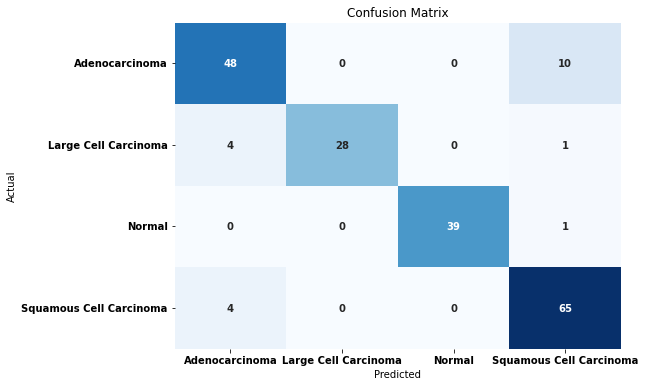

Epoch 1/30
25/25 [==============================] - 54s 2s/step - loss: 1.3755 - accuracy: 0.3237
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 1.3423 - accuracy: 0.3713
Epoch 3/30
25/25 [==============================] - 51s 2s/step - loss: 1.3236 - accuracy: 0.3688
Epoch 4/30
25/25 [==============================] - 51s 2s/step - loss: 1.3587 - accuracy: 0.3400
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 1.3393 - accuracy: 0.3487
Epoch 6/30
25/25 [==============================] - 50s 2s/step - loss: 1.2061 - accuracy: 0.4338
Epoch 7/30
25/25 [==============================] - 49s 2s/step - loss: 0.9905 - accuracy: 0.5138
Epoch 8/30
25/25 [==============================] - 50s 2s/step - loss: 0.8305 - accuracy: 0.5950
Epoch 9/30
25/25 [==============================] - 51s 2s/step - loss: 0.7608 - accuracy: 0.6850
Epoch 10/30
25/25 [==============================] - 51s 2s/step - loss: 0.6591 - accuracy: 0.7075
Epoch 11/30
25/25 [

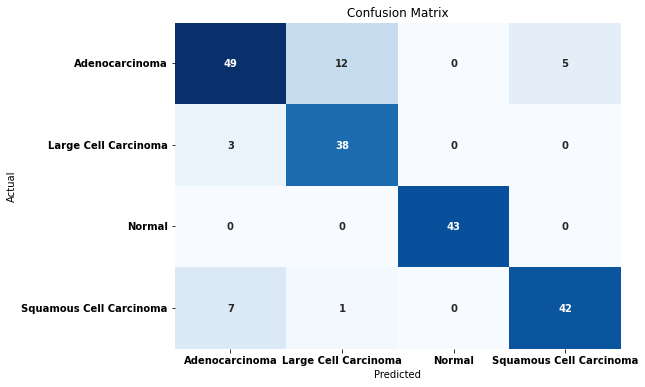

Accuracy List: [0.91, 0.835, 0.905, 0.9, 0.86]
Precision List: [0.9135627442466349, 0.8371721898197242, 0.9063045260156807, 0.9048051948051947, 0.865217149968534]
Recall List: [0.91, 0.835, 0.905, 0.9, 0.86]
F1 List: [0.9106011089084299, 0.8346294587925794, 0.9047006064635719, 0.9003460714041526, 0.8595626714477812]
AUC List: [0.987443795425615, 0.9775067046996871, 0.9830381482604443, 0.9836160360476328, 0.9744359935142691]
Average Test Accuracy: 0.882
Average Precision: 0.8854123609711537
Average Recall: 0.882
Average F1 Score: 0.881967983403303
Average AUC Score: 0.9812081355895297


In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Add, GlobalAveragePooling2D, GlobalMaxPooling2D, Activation, Multiply
from tensorflow.keras.models import Model
from sklearn.utils import shuffle
def spatial_attention_block(C_A):
    x = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(C_A)
    y = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(C_A)
    
    x = Concatenate()([x, y])
    x = Activation('relu')(x)
    x = Conv2D(1, 1, padding='same')(x)
    x = Activation('sigmoid')(x)
    S_A = Multiply()([x, C_A])
    
    return S_A

def self_attention(inp):
    shp = inp.shape
    a = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    a = Activation('relu')(a)
    
    b = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    b = Activation('relu')(b)
    
    c = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    c = Activation('relu')(c)
    
    a = Reshape((shp[1] * shp[2], shp[3] // 8))(a)
    b = Reshape((shp[1] * shp[2], shp[3] // 8))(b)
    b = K.permute_dimensions(b, (0, 2, 1))
    c = Reshape((shp[1] * shp[2], shp[3] // 8))(c)
    inter = K.batch_dot(a, b)
    inter = Activation('softmax')(inter)
    out = K.batch_dot(inter, c)
    out = Reshape((shp[1], shp[2], shp[3] // 8))(out)
    out = Conv2D(shp[3], 1, padding='same')(out)
    out = Activation('relu')(out)
    
    return out

def SqueezeAndExcitation(inputs, ratio=8):
    b, _, _, c = K.int_shape(inputs)
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(c // ratio, activation="relu", use_bias=False)(x)
    x = Dense(c, activation="sigmoid", use_bias=False)(x)
    x = Multiply()([inputs, x])
    return x


def channel_attention(inputs):
    shape = K.int_shape(inputs)
    x = MaxPooling2D(pool_size=(shape[1], shape[2]))(inputs)
    x = Conv2D(shape[3] // 8, 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('relu')(x)
    x = Conv2D(shape[3], 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('sigmoid')(x)
    x = Multiply()([x, inputs])
    
    return x


def create_lightweight_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = AveragePooling2D((2, 2))(x)  # GlobalAveragePooling2D instead of Flatten
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    a31 = self_attention(x)
    a32 = spatial_attention_block(x)
    a3 = Add()([a31, a32])
    x = channel_attention(a3)
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = GlobalMaxPooling2D()(x)  # GlobalMaxPooling2D instead of Flatten
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)  # Using num_classes instead of hardcoded 4
    model = Model(inputs, outputs)
    return model

 

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined create_lightweight_cnn and X, y
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
num_classes = 4  # Example number of classes
input_shape = (224, 224, 3)  # Example input shape (height, width, channels)
k = 5  # Number of folds for cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the model
    model = create_lightweight_cnn(input_shape, num_classes)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=30)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate and store metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    auc = roc_auc_score(y_true_classes, y_pred, multi_class='ovo')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    
    # Append metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

    # Display the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'], 
                yticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'],
                annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Set labels to bold
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    plt.show()

# Calculate the average of the individual metrics
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)


print("Accuracy List:", accuracy_list)
print("Precision List:", precision_list)
print("Recall List:", recall_list)
print("F1 List:", f1_list)
print("AUC List:", auc_list)


# Print the average metrics
print("Average Test Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print("Average AUC Score:", average_auc)



**CBAM**

Epoch 1/30
25/25 [==============================] - 50s 2s/step - loss: 1.3547 - accuracy: 0.3313
Epoch 2/30
25/25 [==============================] - 48s 2s/step - loss: 1.3145 - accuracy: 0.4112
Epoch 3/30
25/25 [==============================] - 50s 2s/step - loss: 1.0283 - accuracy: 0.5450
Epoch 4/30
25/25 [==============================] - 49s 2s/step - loss: 0.8973 - accuracy: 0.5900
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 0.7625 - accuracy: 0.6675
Epoch 6/30
25/25 [==============================] - 48s 2s/step - loss: 0.5616 - accuracy: 0.7613
Epoch 7/30
25/25 [==============================] - 48s 2s/step - loss: 0.4179 - accuracy: 0.8250
Epoch 8/30
25/25 [==============================] - 50s 2s/step - loss: 0.3271 - accuracy: 0.8838
Epoch 9/30
25/25 [==============================] - 50s 2s/step - loss: 0.3089 - accuracy: 0.8737
Epoch 10/30
25/25 [==============================] - 51s 2s/step - loss: 0.2389 - accuracy: 0.9175
Epoch 11/30
25/25 [

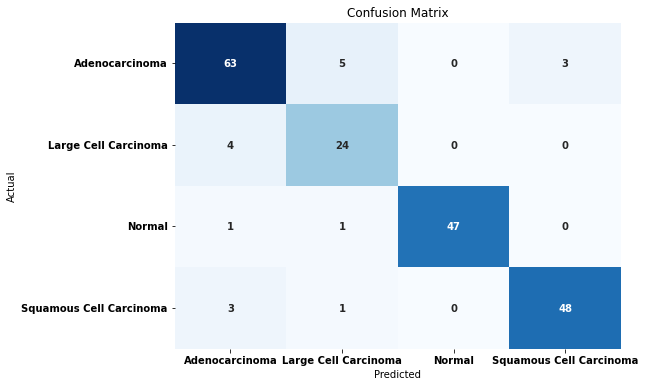

Epoch 1/30
25/25 [==============================] - 80s 2s/step - loss: 1.3671 - accuracy: 0.3363
Epoch 2/30
25/25 [==============================] - 49s 2s/step - loss: 1.1894 - accuracy: 0.4437
Epoch 3/30
25/25 [==============================] - 48s 2s/step - loss: 1.1007 - accuracy: 0.4588
Epoch 4/30
25/25 [==============================] - 50s 2s/step - loss: 0.9996 - accuracy: 0.5387
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 0.8172 - accuracy: 0.6562
Epoch 6/30
25/25 [==============================] - 50s 2s/step - loss: 0.6362 - accuracy: 0.7350
Epoch 7/30
25/25 [==============================] - 52s 2s/step - loss: 0.4300 - accuracy: 0.8250
Epoch 8/30
25/25 [==============================] - 50s 2s/step - loss: 0.4391 - accuracy: 0.8125
Epoch 9/30
25/25 [==============================] - 46s 2s/step - loss: 0.1863 - accuracy: 0.9262
Epoch 10/30
25/25 [==============================] - 51s 2s/step - loss: 0.1920 - accuracy: 0.9237
Epoch 11/30
25/25 [

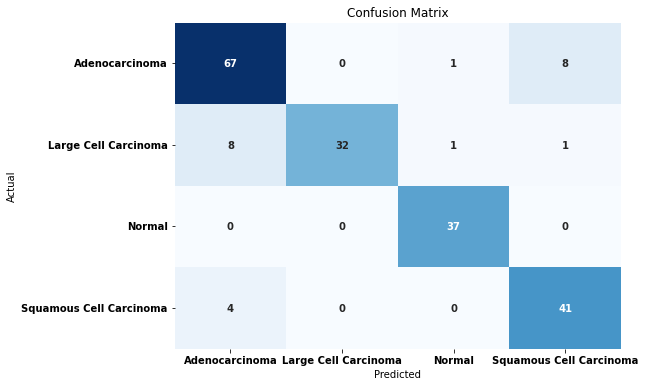

Epoch 1/30
25/25 [==============================] - 50s 2s/step - loss: 1.3747 - accuracy: 0.3275
Epoch 2/30
25/25 [==============================] - 48s 2s/step - loss: 1.2874 - accuracy: 0.3837
Epoch 3/30
25/25 [==============================] - 49s 2s/step - loss: 1.1214 - accuracy: 0.4712
Epoch 4/30
25/25 [==============================] - 50s 2s/step - loss: 1.0042 - accuracy: 0.5125
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 0.8736 - accuracy: 0.6162
Epoch 6/30
25/25 [==============================] - 50s 2s/step - loss: 0.7104 - accuracy: 0.7312
Epoch 7/30
25/25 [==============================] - 50s 2s/step - loss: 0.5792 - accuracy: 0.7862
Epoch 8/30
25/25 [==============================] - 49s 2s/step - loss: 0.4699 - accuracy: 0.8175
Epoch 9/30
25/25 [==============================] - 48s 2s/step - loss: 0.4108 - accuracy: 0.8388
Epoch 10/30
25/25 [==============================] - 50s 2s/step - loss: 0.3184 - accuracy: 0.8813
Epoch 11/30
25/25 [

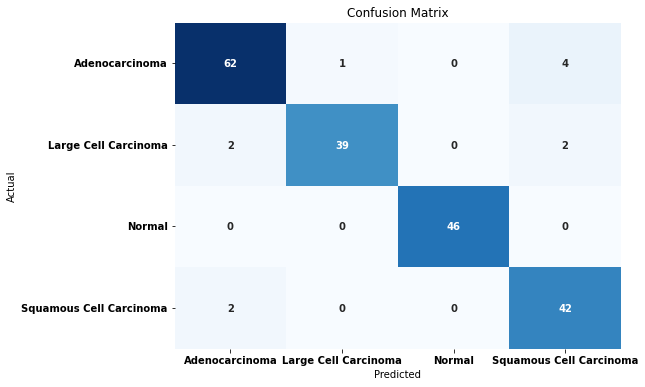

Epoch 1/30
25/25 [==============================] - 53s 2s/step - loss: 1.3720 - accuracy: 0.3425
Epoch 2/30
25/25 [==============================] - 48s 2s/step - loss: 1.2611 - accuracy: 0.4263
Epoch 3/30
25/25 [==============================] - 50s 2s/step - loss: 1.0986 - accuracy: 0.4975
Epoch 4/30
25/25 [==============================] - 50s 2s/step - loss: 0.9606 - accuracy: 0.5562
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 0.7736 - accuracy: 0.6687
Epoch 6/30
25/25 [==============================] - 50s 2s/step - loss: 0.6208 - accuracy: 0.7125
Epoch 7/30
25/25 [==============================] - 51s 2s/step - loss: 0.7671 - accuracy: 0.6850
Epoch 8/30
25/25 [==============================] - 49s 2s/step - loss: 0.4582 - accuracy: 0.7937
Epoch 9/30
25/25 [==============================] - 49s 2s/step - loss: 0.3308 - accuracy: 0.8625
Epoch 10/30
25/25 [==============================] - 51s 2s/step - loss: 0.3555 - accuracy: 0.8550
Epoch 11/30
25/25 [

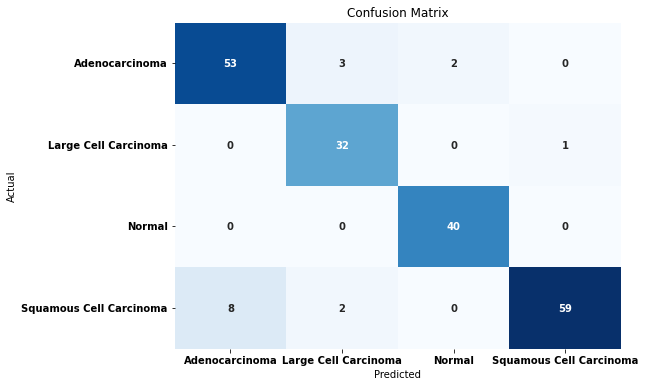

Epoch 1/30
25/25 [==============================] - 52s 2s/step - loss: 1.3991 - accuracy: 0.3125
Epoch 2/30
25/25 [==============================] - 48s 2s/step - loss: 1.3220 - accuracy: 0.3812
Epoch 3/30
25/25 [==============================] - 50s 2s/step - loss: 1.1367 - accuracy: 0.4638
Epoch 4/30
25/25 [==============================] - 50s 2s/step - loss: 1.1518 - accuracy: 0.4663
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 1.0798 - accuracy: 0.4913
Epoch 6/30
25/25 [==============================] - 50s 2s/step - loss: 0.8386 - accuracy: 0.6538
Epoch 7/30
25/25 [==============================] - 51s 2s/step - loss: 0.6690 - accuracy: 0.7525
Epoch 8/30
25/25 [==============================] - 48s 2s/step - loss: 0.5432 - accuracy: 0.7600
Epoch 9/30
25/25 [==============================] - 50s 2s/step - loss: 0.4137 - accuracy: 0.8425
Epoch 10/30
25/25 [==============================] - 54s 2s/step - loss: 0.3543 - accuracy: 0.8712
Epoch 11/30
25/25 [

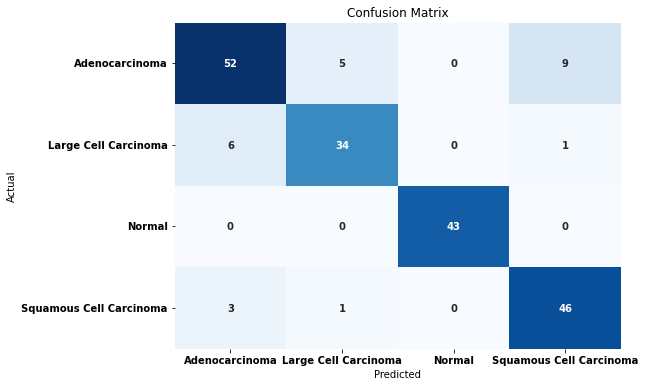

Accuracy List: [0.91, 0.885, 0.945, 0.92, 0.875]
Precision List: [0.9130929791271347, 0.8922913015254789, 0.9468219696969697, 0.9243961062936472, 0.8759186182669788]
Recall List: [0.91, 0.885, 0.945, 0.92, 0.875]
F1 List: [0.9111242355054577, 0.8844798559170376, 0.9452485850561447, 0.9198798171565847, 0.8743161179800114]
AUC List: [0.981219933415248, 0.9872499849473533, 0.9870269596040387, 0.994532878762639, 0.9805760526421331]
Average Test Accuracy: 0.907
Average Precision: 0.9105041949820418
Average Recall: 0.907
Average F1 Score: 0.9070097223230473
Average AUC Score: 0.9861211618742824


In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Add, GlobalAveragePooling2D, GlobalMaxPooling2D, Activation, Multiply
from tensorflow.keras.models import Model
from sklearn.utils import shuffle

def channel_attention_module(x, ratio=8):
    batch, _, _, channel = x.shape

    # Shared layers
    l1 = layers.Dense(channel // ratio, activation="relu", use_bias=False)
    l2 = layers.Dense(channel, use_bias=False)

    # Global Average Pooling
    x1 = layers.GlobalAveragePooling2D()(x)
    x1 = l1(x1)
    x1 = l2(x1)

    # Global Max Pooling
    x2 = layers.GlobalMaxPooling2D()(x)
    x2 = l1(x2)
    x2 = l2(x2)

    # Add both the features and pass through sigmoid
    feats = x1 + x2
    feats = layers.Activation("sigmoid")(feats)
    feats = layers.Multiply()([x, feats])

    return feats

def spatial_attention_module(x):
    # Average Pooling
    x1 = tf.reduce_mean(x, axis=-1)
    x1 = tf.expand_dims(x1, axis=-1)

    # Max Pooling
    x2 = tf.reduce_max(x, axis=-1)
    x2 = tf.expand_dims(x2, axis=-1)

    # Concatenate both the features
    feats = layers.Concatenate()([x1, x2])

    # Conv layer
    feats = layers.Conv2D(1, kernel_size=7, padding="same", activation="sigmoid")(feats)
    feats = layers.Multiply()([x, feats])

    return feats

def cbam(x):
    x = channel_attention_module(x)
    x = spatial_attention_module(x)
    return x


def create_lightweight_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = AveragePooling2D((2, 2))(x)  # GlobalAveragePooling2D instead of Flatten
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = cbam(x)
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = Flatten()(x)  # GlobalMaxPooling2D instead of Flatten
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)  # Using num_classes instead of hardcoded 4
    model = Model(inputs, outputs)
    return model

 

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined create_lightweight_cnn and X, y
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
num_classes = 4  # Example number of classes
input_shape = (224, 224, 3)  # Example input shape (height, width, channels)
k = 5  # Number of folds for cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the model
    model = create_lightweight_cnn(input_shape, num_classes)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=30)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate and store metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    auc = roc_auc_score(y_true_classes, y_pred, multi_class='ovo')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    
    # Append metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

    # Display the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'], 
                yticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'],
                annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Set labels to bold
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    plt.show()

# Calculate the average of the individual metrics
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)


print("Accuracy List:", accuracy_list)
print("Precision List:", precision_list)
print("Recall List:", recall_list)
print("F1 List:", f1_list)
print("AUC List:", auc_list)


# Print the average metrics
print("Average Test Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print("Average AUC Score:", average_auc)



**SE**

Epoch 1/30
25/25 [==============================] - 72s 1s/step - loss: 1.3516 - accuracy: 0.3400
Epoch 2/30
25/25 [==============================] - 35s 1s/step - loss: 1.1889 - accuracy: 0.4375
Epoch 3/30
25/25 [==============================] - 35s 1s/step - loss: 0.9813 - accuracy: 0.5650
Epoch 4/30
25/25 [==============================] - 35s 1s/step - loss: 0.8376 - accuracy: 0.6263
Epoch 5/30
25/25 [==============================] - 37s 1s/step - loss: 0.7583 - accuracy: 0.6775
Epoch 6/30
25/25 [==============================] - 36s 1s/step - loss: 0.6688 - accuracy: 0.7212
Epoch 7/30
25/25 [==============================] - 35s 1s/step - loss: 0.5458 - accuracy: 0.7850
Epoch 8/30
25/25 [==============================] - 34s 1s/step - loss: 0.4566 - accuracy: 0.8300
Epoch 9/30
25/25 [==============================] - 36s 1s/step - loss: 0.3705 - accuracy: 0.8600
Epoch 10/30
25/25 [==============================] - 36s 1s/step - loss: 0.3205 - accuracy: 0.8838
Epoch 11/30
25/25 [

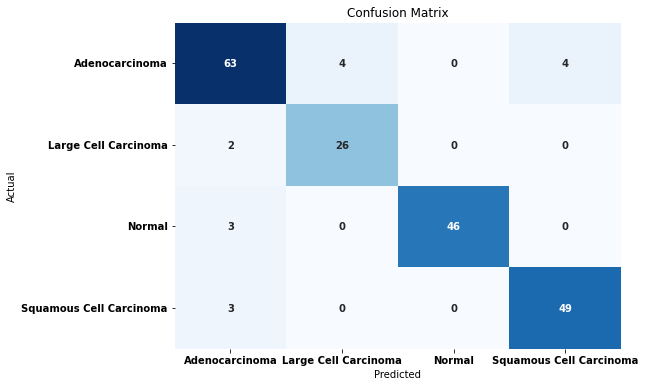

Epoch 1/30
25/25 [==============================] - 58s 2s/step - loss: 1.3475 - accuracy: 0.3413
Epoch 2/30
25/25 [==============================] - 54s 2s/step - loss: 1.1933 - accuracy: 0.4475
Epoch 3/30
25/25 [==============================] - 52s 2s/step - loss: 0.9771 - accuracy: 0.5875
Epoch 4/30
25/25 [==============================] - 50s 2s/step - loss: 0.8253 - accuracy: 0.6400
Epoch 5/30
25/25 [==============================] - 52s 2s/step - loss: 0.6903 - accuracy: 0.7200
Epoch 6/30
25/25 [==============================] - 52s 2s/step - loss: 0.5844 - accuracy: 0.7550
Epoch 7/30
25/25 [==============================] - 52s 2s/step - loss: 0.4695 - accuracy: 0.8225
Epoch 8/30
25/25 [==============================] - 52s 2s/step - loss: 0.3783 - accuracy: 0.8662
Epoch 9/30
25/25 [==============================] - 54s 2s/step - loss: 0.3062 - accuracy: 0.8838
Epoch 10/30
25/25 [==============================] - 50s 2s/step - loss: 0.2759 - accuracy: 0.8963
Epoch 11/30
25/25 [

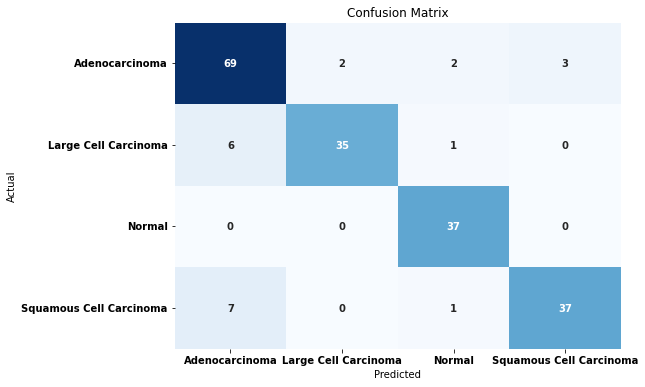

Epoch 1/30
25/25 [==============================] - 62s 2s/step - loss: 1.3545 - accuracy: 0.3475
Epoch 2/30
25/25 [==============================] - 52s 2s/step - loss: 1.2491 - accuracy: 0.4187
Epoch 3/30
25/25 [==============================] - 51s 2s/step - loss: 1.0720 - accuracy: 0.4988
Epoch 4/30
25/25 [==============================] - 50s 2s/step - loss: 0.8917 - accuracy: 0.5975
Epoch 5/30
25/25 [==============================] - 52s 2s/step - loss: 0.7176 - accuracy: 0.7237
Epoch 6/30
25/25 [==============================] - 55s 2s/step - loss: 0.6120 - accuracy: 0.7575
Epoch 7/30
25/25 [==============================] - 61s 2s/step - loss: 0.4798 - accuracy: 0.8050
Epoch 8/30
25/25 [==============================] - 59s 2s/step - loss: 0.3953 - accuracy: 0.8487
Epoch 9/30
25/25 [==============================] - 55s 2s/step - loss: 0.3327 - accuracy: 0.8725
Epoch 10/30
25/25 [==============================] - 54s 2s/step - loss: 0.2640 - accuracy: 0.9025
Epoch 11/30
25/25 [

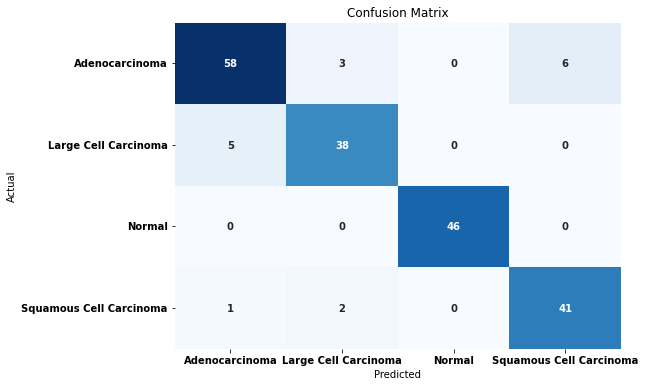

Epoch 1/30
25/25 [==============================] - 57s 2s/step - loss: 1.3525 - accuracy: 0.3600
Epoch 2/30
25/25 [==============================] - 54s 2s/step - loss: 1.2196 - accuracy: 0.4613
Epoch 3/30
25/25 [==============================] - 52s 2s/step - loss: 1.0323 - accuracy: 0.5437
Epoch 4/30
25/25 [==============================] - 51s 2s/step - loss: 0.8873 - accuracy: 0.6150
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 0.7731 - accuracy: 0.6650
Epoch 6/30
25/25 [==============================] - 50s 2s/step - loss: 0.7096 - accuracy: 0.7100
Epoch 7/30
25/25 [==============================] - 48s 2s/step - loss: 0.5761 - accuracy: 0.7638
Epoch 8/30
25/25 [==============================] - 50s 2s/step - loss: 0.4675 - accuracy: 0.8150
Epoch 9/30
25/25 [==============================] - 51s 2s/step - loss: 0.4014 - accuracy: 0.8450
Epoch 10/30
25/25 [==============================] - 53s 2s/step - loss: 0.3143 - accuracy: 0.8750
Epoch 11/30
25/25 [

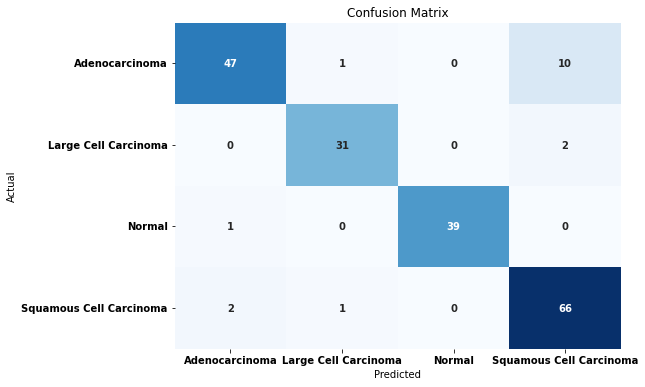

Epoch 1/30
25/25 [==============================] - 53s 2s/step - loss: 1.3524 - accuracy: 0.3575
Epoch 2/30
25/25 [==============================] - 52s 2s/step - loss: 1.2202 - accuracy: 0.4425
Epoch 3/30
25/25 [==============================] - 53s 2s/step - loss: 1.0320 - accuracy: 0.5312
Epoch 4/30
25/25 [==============================] - 52s 2s/step - loss: 0.8746 - accuracy: 0.6075
Epoch 5/30
25/25 [==============================] - 53s 2s/step - loss: 0.7327 - accuracy: 0.6963
Epoch 6/30
25/25 [==============================] - 53s 2s/step - loss: 0.6118 - accuracy: 0.7613
Epoch 7/30
25/25 [==============================] - 53s 2s/step - loss: 0.5105 - accuracy: 0.8062
Epoch 8/30
25/25 [==============================] - 53s 2s/step - loss: 0.4141 - accuracy: 0.8587
Epoch 9/30
25/25 [==============================] - 56s 2s/step - loss: 0.3484 - accuracy: 0.8700
Epoch 10/30
25/25 [==============================] - 51s 2s/step - loss: 0.2920 - accuracy: 0.9038
Epoch 11/30
25/25 [

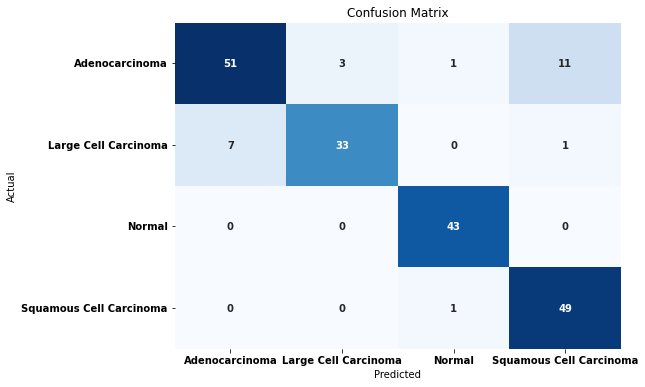

Accuracy List: [0.92, 0.89, 0.915, 0.915, 0.88]
Precision List: [0.9217106918238993, 0.8934809657218193, 0.9155086436170212, 0.919523076923077, 0.8843531970353621]
Recall List: [0.92, 0.89, 0.915, 0.915, 0.88]
F1 List: [0.9204470659407139, 0.8893698569983007, 0.914882979615804, 0.9146716802051341, 0.8780002557018686]
AUC List: [0.9898843611117253, 0.9881886429035552, 0.9882811303122224, 0.9897359243358119, 0.9768612672384651]
Average Test Accuracy: 0.9040000000000001
Average Precision: 0.9069153150242357
Average Recall: 0.9040000000000001
Average F1 Score: 0.9034743676923643
Average AUC Score: 0.9865902651803559


In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Add, GlobalAveragePooling2D, GlobalMaxPooling2D, Activation, Multiply
from tensorflow.keras.models import Model
from sklearn.utils import shuffle
def spatial_attention_block(C_A):
    x = Lambda(lambda x: K.mean(x, axis=-1, keepdims=True))(C_A)
    y = Lambda(lambda x: K.max(x, axis=-1, keepdims=True))(C_A)
    
    x = Concatenate()([x, y])
    x = Activation('relu')(x)
    x = Conv2D(1, 1, padding='same')(x)
    x = Activation('sigmoid')(x)
    S_A = Multiply()([x, C_A])
    
    return S_A

def self_attention(inp):
    shp = inp.shape
    a = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    a = Activation('relu')(a)
    
    b = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    b = Activation('relu')(b)
    
    c = Conv2D(shp[3] // 8, 1, padding='same')(inp)
    c = Activation('relu')(c)
    
    a = Reshape((shp[1] * shp[2], shp[3] // 8))(a)
    b = Reshape((shp[1] * shp[2], shp[3] // 8))(b)
    b = K.permute_dimensions(b, (0, 2, 1))
    c = Reshape((shp[1] * shp[2], shp[3] // 8))(c)
    inter = K.batch_dot(a, b)
    inter = Activation('softmax')(inter)
    out = K.batch_dot(inter, c)
    out = Reshape((shp[1], shp[2], shp[3] // 8))(out)
    out = Conv2D(shp[3], 1, padding='same')(out)
    out = Activation('relu')(out)
    
    return out

def SqueezeAndExcitation(inputs, ratio=8):
    b, _, _, c = K.int_shape(inputs)
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(c // ratio, activation="relu", use_bias=False)(x)
    x = Dense(c, activation="sigmoid", use_bias=False)(x)
    x = Multiply()([inputs, x])
    return x


def channel_attention(inputs):
    shape = K.int_shape(inputs)
    x = MaxPooling2D(pool_size=(shape[1], shape[2]))(inputs)
    x = Conv2D(shape[3] // 8, 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('relu')(x)
    x = Conv2D(shape[3], 1, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = Activation('sigmoid')(x)
    x = Multiply()([x, inputs])
    
    return x

def create_lightweight_cnn(input_shape,num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = AveragePooling2D((2, 2))(x)  # Average pooling layer added
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
#     a31 = self_attention(x)
#     a32 = spatial_attention_block(x)
#     a3 = Add()([a31, a32])
#     x = channel_attention(a3)
    x=SqueezeAndExcitation(x)
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(4, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

 

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined create_lightweight_cnn and X, y
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
num_classes = 4  # Example number of classes
input_shape = (224, 224, 3)  # Example input shape (height, width, channels)
k = 5  # Number of folds for cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
specificity_list = []  # New list for specificity

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the model
    model = create_lightweight_cnn(input_shape, num_classes)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=30)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate and store metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    auc = roc_auc_score(y_true_classes, y_pred, multi_class='ovo')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    
    
    # Append metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

    # Display the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'], 
                yticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'],
                annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Set labels to bold
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    plt.show()

# Calculate the average of the individual metrics
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)

print("Accuracy List:", accuracy_list)
print("Precision List:", precision_list)
print("Recall List:", recall_list)
print("F1 List:", f1_list)
print("AUC List:", auc_list)

# Print the average metrics
print("Average Test Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print("Average AUC Score:", average_auc)



**Without Attention**

Epoch 1/30
25/25 [==============================] - 38s 1s/step - loss: 1.3531 - accuracy: 0.3250
Epoch 2/30
25/25 [==============================] - 35s 1s/step - loss: 1.1971 - accuracy: 0.4425
Epoch 3/30
25/25 [==============================] - 35s 1s/step - loss: 0.9889 - accuracy: 0.5375
Epoch 4/30
25/25 [==============================] - 33s 1s/step - loss: 0.8554 - accuracy: 0.6388
Epoch 5/30
25/25 [==============================] - 34s 1s/step - loss: 0.7435 - accuracy: 0.6812
Epoch 6/30
25/25 [==============================] - 34s 1s/step - loss: 0.6348 - accuracy: 0.7450
Epoch 7/30
25/25 [==============================] - 34s 1s/step - loss: 0.5524 - accuracy: 0.7738
Epoch 8/30
25/25 [==============================] - 34s 1s/step - loss: 0.4546 - accuracy: 0.8200
Epoch 9/30
25/25 [==============================] - 34s 1s/step - loss: 0.3642 - accuracy: 0.8737
Epoch 10/30
25/25 [==============================] - 34s 1s/step - loss: 0.2968 - accuracy: 0.8875
Epoch 11/30
25/25 [

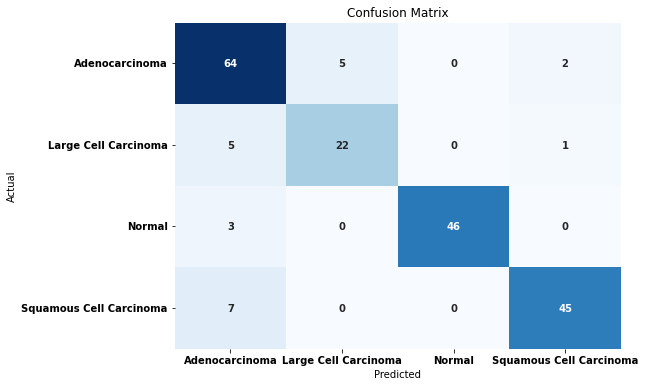

Epoch 1/30
25/25 [==============================] - 59s 2s/step - loss: 1.3404 - accuracy: 0.3500
Epoch 2/30
25/25 [==============================] - 53s 2s/step - loss: 1.1505 - accuracy: 0.4675
Epoch 3/30
25/25 [==============================] - 51s 2s/step - loss: 0.9019 - accuracy: 0.6175
Epoch 4/30
25/25 [==============================] - 52s 2s/step - loss: 0.7449 - accuracy: 0.6925
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 0.6055 - accuracy: 0.7600
Epoch 6/30
25/25 [==============================] - 52s 2s/step - loss: 0.4671 - accuracy: 0.8225
Epoch 7/30
25/25 [==============================] - 52s 2s/step - loss: 0.3801 - accuracy: 0.8587
Epoch 8/30
25/25 [==============================] - 50s 2s/step - loss: 0.3055 - accuracy: 0.8875
Epoch 9/30
25/25 [==============================] - 52s 2s/step - loss: 0.2340 - accuracy: 0.9150
Epoch 10/30
25/25 [==============================] - 52s 2s/step - loss: 0.1851 - accuracy: 0.9362
Epoch 11/30
25/25 [

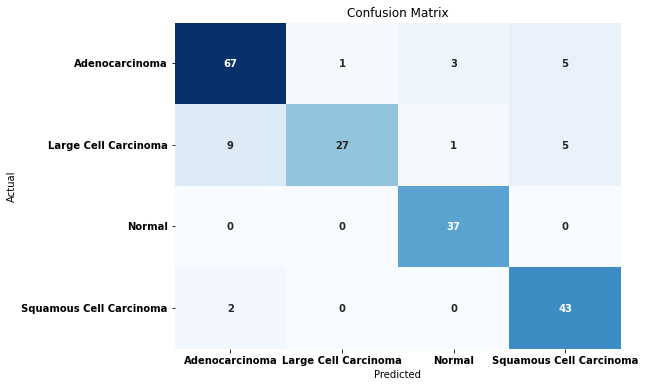

Epoch 1/30
25/25 [==============================] - 56s 2s/step - loss: 1.3432 - accuracy: 0.3487
Epoch 2/30
25/25 [==============================] - 50s 2s/step - loss: 1.1565 - accuracy: 0.4500
Epoch 3/30
25/25 [==============================] - 51s 2s/step - loss: 0.9558 - accuracy: 0.5763
Epoch 4/30
25/25 [==============================] - 51s 2s/step - loss: 0.8017 - accuracy: 0.6637
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 0.6799 - accuracy: 0.7212
Epoch 6/30
25/25 [==============================] - 52s 2s/step - loss: 0.5441 - accuracy: 0.7900
Epoch 7/30
25/25 [==============================] - 50s 2s/step - loss: 0.4234 - accuracy: 0.8487
Epoch 8/30
25/25 [==============================] - 51s 2s/step - loss: 0.3352 - accuracy: 0.8800
Epoch 9/30
25/25 [==============================] - 52s 2s/step - loss: 0.2689 - accuracy: 0.9025
Epoch 10/30
25/25 [==============================] - 51s 2s/step - loss: 0.2341 - accuracy: 0.9062
Epoch 11/30
25/25 [

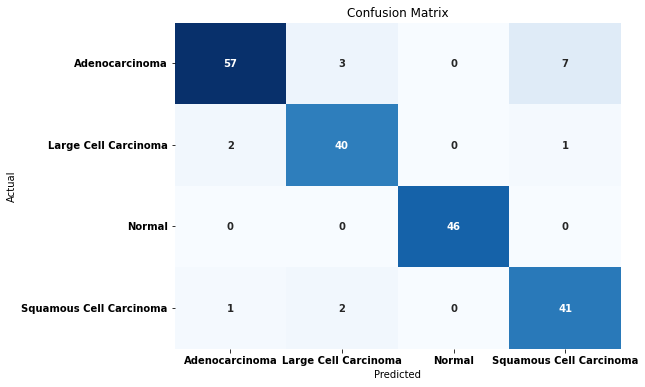

Epoch 1/30
25/25 [==============================] - 55s 2s/step - loss: 1.3412 - accuracy: 0.3738
Epoch 2/30
25/25 [==============================] - 50s 2s/step - loss: 1.1706 - accuracy: 0.4737
Epoch 3/30
25/25 [==============================] - 50s 2s/step - loss: 0.9398 - accuracy: 0.5700
Epoch 4/30
25/25 [==============================] - 50s 2s/step - loss: 0.7946 - accuracy: 0.6612
Epoch 5/30
25/25 [==============================] - 51s 2s/step - loss: 0.6726 - accuracy: 0.7212
Epoch 6/30
25/25 [==============================] - 50s 2s/step - loss: 0.5839 - accuracy: 0.7513
Epoch 7/30
25/25 [==============================] - 52s 2s/step - loss: 0.4524 - accuracy: 0.8225
Epoch 8/30
25/25 [==============================] - 52s 2s/step - loss: 0.3645 - accuracy: 0.8525
Epoch 9/30
25/25 [==============================] - 53s 2s/step - loss: 0.2858 - accuracy: 0.8875
Epoch 10/30
25/25 [==============================] - 47s 2s/step - loss: 0.2149 - accuracy: 0.9162
Epoch 11/30
25/25 [

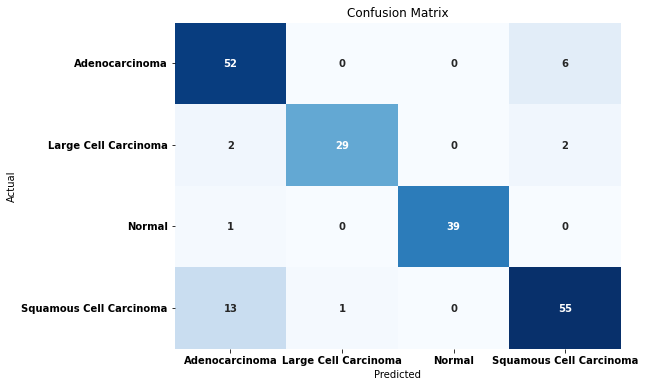

Epoch 1/30
25/25 [==============================] - 54s 2s/step - loss: 1.3474 - accuracy: 0.3500
Epoch 2/30
25/25 [==============================] - 51s 2s/step - loss: 1.1745 - accuracy: 0.4575
Epoch 3/30
25/25 [==============================] - 47s 2s/step - loss: 0.9606 - accuracy: 0.5800
Epoch 4/30
25/25 [==============================] - 52s 2s/step - loss: 0.7918 - accuracy: 0.6812
Epoch 5/30
25/25 [==============================] - 50s 2s/step - loss: 0.6597 - accuracy: 0.7375
Epoch 6/30
25/25 [==============================] - 50s 2s/step - loss: 0.5458 - accuracy: 0.8000
Epoch 7/30
25/25 [==============================] - 51s 2s/step - loss: 0.4088 - accuracy: 0.8300
Epoch 8/30
25/25 [==============================] - 52s 2s/step - loss: 0.3301 - accuracy: 0.8775
Epoch 9/30
25/25 [==============================] - 48s 2s/step - loss: 0.2645 - accuracy: 0.9137
Epoch 10/30
25/25 [==============================] - 49s 2s/step - loss: 0.2177 - accuracy: 0.9150
Epoch 11/30
25/25 [

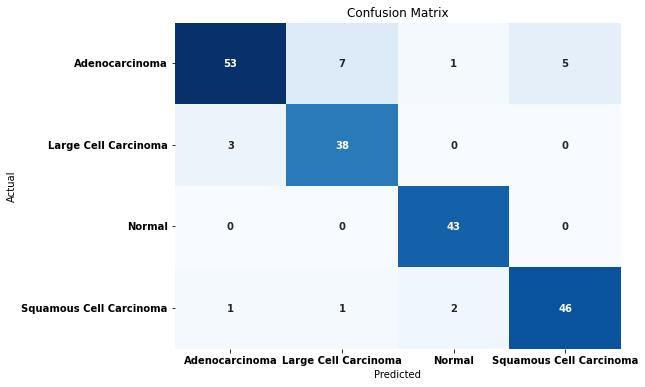

Accuracy List: [0.885, 0.87, 0.92, 0.875, 0.9]
Precision List: [0.8904190107829347, 0.8784086457337723, 0.9234427437641721, 0.8824551820728291, 0.9026583882981111]
Recall List: [0.885, 0.87, 0.92, 0.875, 0.9]
F1 List: [0.8861964912280703, 0.8656111507540077, 0.9201417014955241, 0.8762381957002211, 0.8989462849385458]
AUC List: [0.9852426141095658, 0.9839474969957426, 0.9903170515654104, 0.9852664892301325, 0.9800720334370364]
Average Test Accuracy: 0.89
Average Precision: 0.8954767941303639
Average Recall: 0.89
Average F1 Score: 0.8894267648232738
Average AUC Score: 0.9849691370675775


In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Add, GlobalAveragePooling2D, GlobalMaxPooling2D, Activation, Multiply
from tensorflow.keras.models import Model
from sklearn.utils import shuffle


def create_lightweight_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = AveragePooling2D((2, 2))(x)  # GlobalAveragePooling2D instead of Flatten
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu')(x)
    x = Flatten()(x)  # GlobalMaxPooling2D instead of Flatten
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)  # Using num_classes instead of hardcoded 4
    model = Model(inputs, outputs)
    return model

 

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined create_lightweight_cnn and X, y
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
num_classes = 4  # Example number of classes
input_shape = (224, 224, 3)  # Example input shape (height, width, channels)
k = 5  # Number of folds for cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create the model
    model = create_lightweight_cnn(input_shape, num_classes)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=30)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate and store metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    auc = roc_auc_score(y_true_classes, y_pred, multi_class='ovo')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    
    # Append metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

    # Display the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'], 
                yticklabels=['Adenocarcinoma','Large Cell Carcinoma','Normal','Squamous Cell Carcinoma'],
                annot_kws={"weight": "bold"})  # Set the font weight of annotations to bold

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Set labels to bold
    plt.xticks(fontweight="bold")
    plt.yticks(fontweight="bold")

    plt.show()

# Calculate the average of the individual metrics
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_f1 = np.mean(f1_list)
average_auc = np.mean(auc_list)


print("Accuracy List:", accuracy_list)
print("Precision List:", precision_list)
print("Recall List:", recall_list)
print("F1 List:", f1_list)
print("AUC List:", auc_list)


# Print the average metrics
print("Average Test Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)
print("Average AUC Score:", average_auc)

